## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [2]:
df = pd.read_csv('employee_data.csv')
df.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
df.shape

(1470, 35)

In [5]:
df.head(10)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
5,6,29,NaN,Travel_Rarely,352,Human Resources,6,1,Medical,1,...,4,80,0,1,3,3,1,0,0,0
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
8,9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,...,1,80,0,8,2,3,8,1,1,7
9,10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,...,4,80,0,10,6,3,7,7,7,7


In [6]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.nunique

<bound method DataFrame.nunique of       EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0              1   38        NaN  Travel_Frequently       1444   
1              2   37        1.0      Travel_Rarely       1141   
2              3   51        1.0      Travel_Rarely       1323   
3              4   42        0.0  Travel_Frequently        555   
4              5   40        NaN      Travel_Rarely       1194   
...          ...  ...        ...                ...        ...   
1465        1466   38        0.0      Travel_Rarely        168   
1466        1467   50        NaN      Travel_Rarely        813   
1467        1468   28        1.0      Travel_Rarely       1485   
1468        1469   40        0.0         Non-Travel        458   
1469        1470   19        1.0  Travel_Frequently        602   

                  Department  DistanceFromHome  Education    EducationField  \
0            Human Resources                 1          4             Other   
1     Research

## Data Preprocessing

In [8]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [9]:
df.dropna(axis = 0, inplace = True)

In [10]:
df = df.drop(['Over18', 'EmployeeId', 'EmployeeCount','StandardHours'],axis = 1)

In [11]:
categorical_column = df.select_dtypes(['object']).columns
number_column = df.select_dtypes(['number']).columns
print(categorical_column)
print(number_column)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [12]:
for column in categorical_column:
    print('Unique values of ', column, set(df[column]))

Unique values of  BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
Unique values of  Department {'Human Resources', 'Sales', 'Research & Development'}
Unique values of  EducationField {'Marketing', 'Life Sciences', 'Human Resources', 'Technical Degree', 'Other', 'Medical'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Healthcare Representative', 'Laboratory Technician', 'Sales Executive', 'Sales Representative', 'Manufacturing Director', 'Manager', 'Human Resources', 'Research Scientist', 'Research Director'}
Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  OverTime {'Yes', 'No'}


## EDA

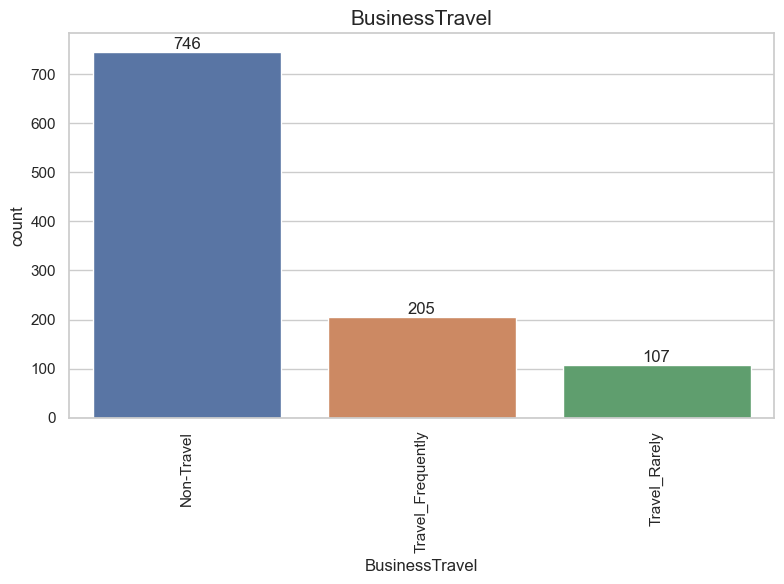

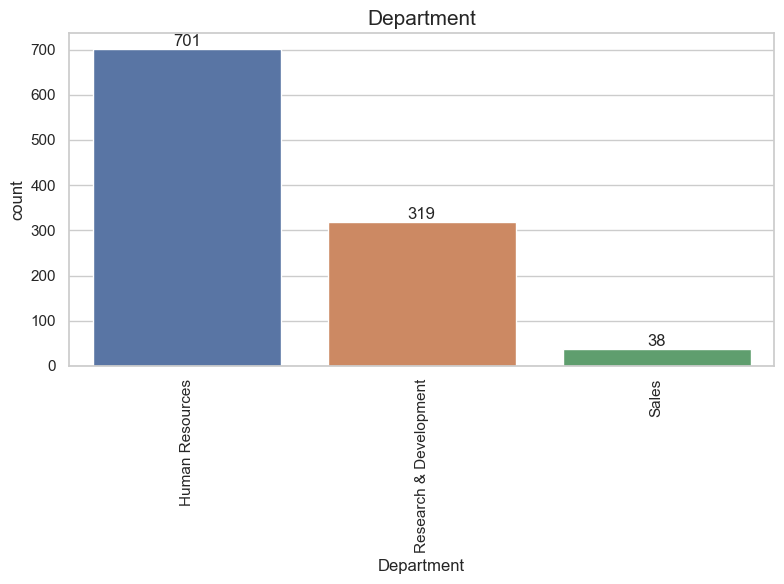

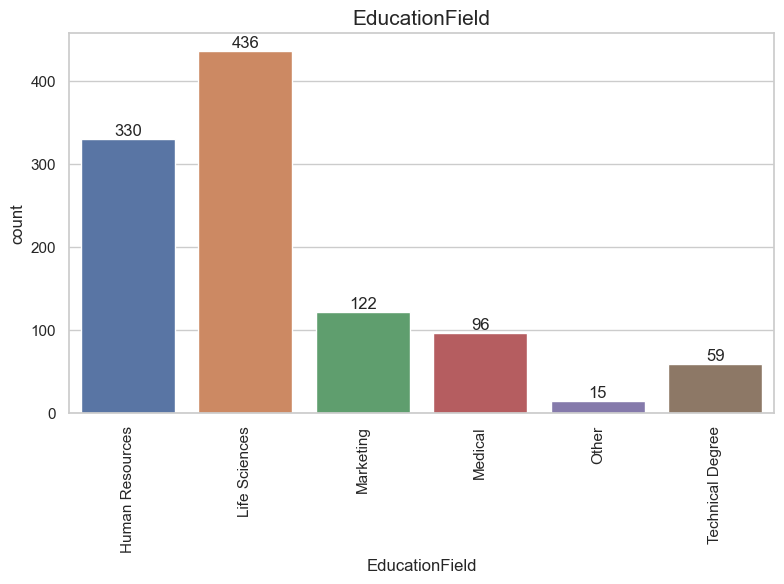

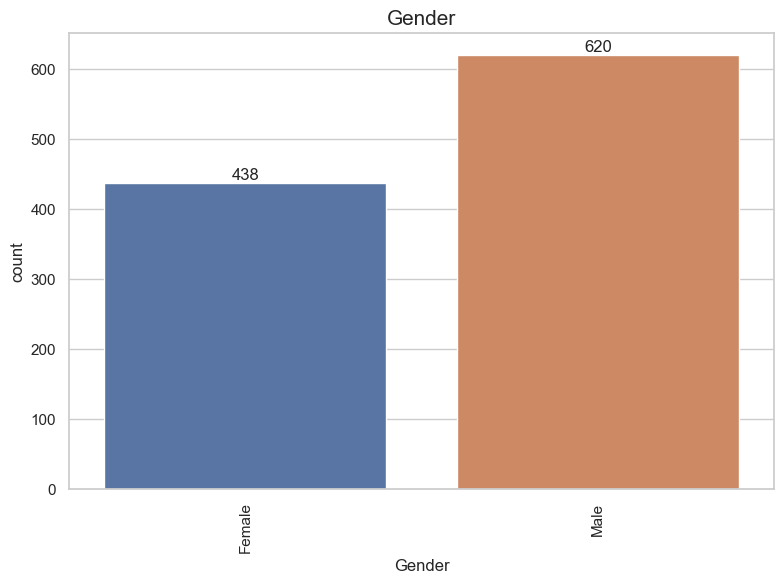

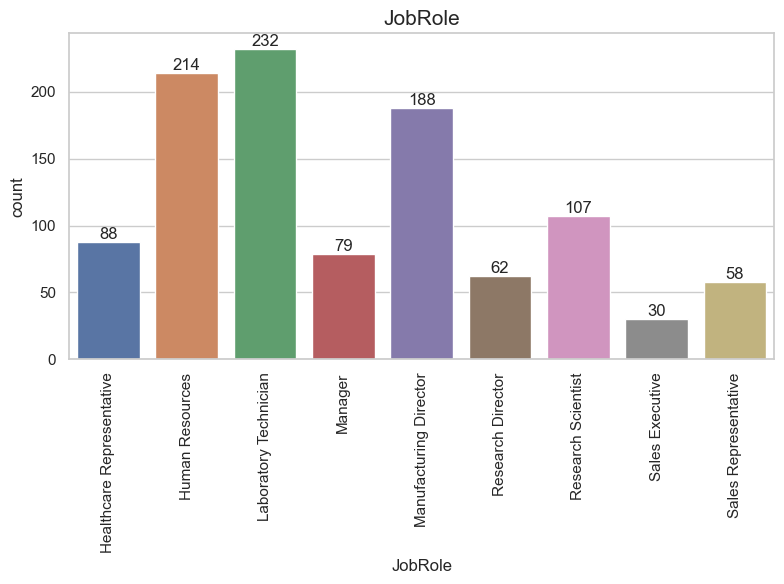

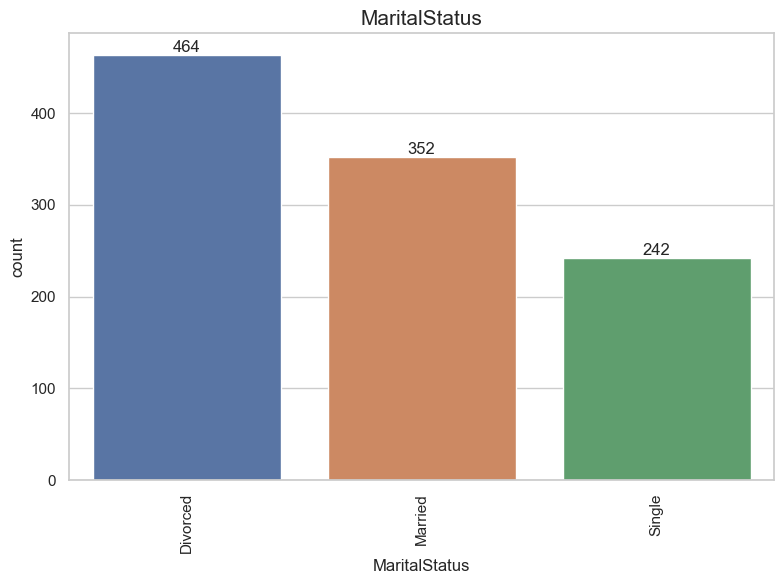

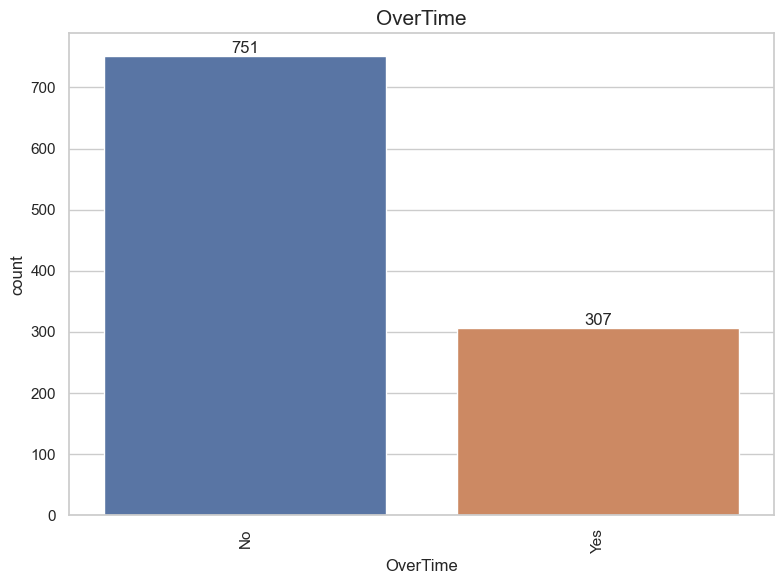

In [13]:
sns.set_theme(style='whitegrid')

for col in categorical_column:
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax = sns.countplot(data=df, x=col, ax=ax)
    
    activities = [var for var in df[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities, rotation=90)
    
    for container in ax.containers:
        ax.bar_label(container)
    
    ax.set_title(col, fontsize=15)
    
    plt.tight_layout()
    plt.show()

In [14]:
data = df.copy()

bins_income = [1000, 5000, 10000, 20000]
bins_rate = [2000, 10000, 18000, 27000]
bins_age = [18, 35, 48, 60]
bins_daily = [100, 500, 1000, 1500]
bins_distance = [1, 10, 20, 30]
bins_hourly = [30, 50, 75, 100]
bins_totalYears = [0, 15, 30, 40]
bins_trainingYears = [0, 2, 4, 6]
bins_yearCompany = [0, 15, 30, 40]

labels = ['Low', 'Medium', 'High']
data['IncomeGroup'] = pd.cut(data['MonthlyIncome'], bins=bins_income, labels=labels, right=False)
data['IncomeRate'] = pd.cut(data['MonthlyRate'], bins=bins_rate, labels=labels, right=False)
data['ageGroup'] = pd.cut(data['Age'], bins=bins_age, labels=labels, right=False)
data['dailyGroup'] = pd.cut(data['DailyRate'], bins=bins_daily, labels=labels, right=False)
data['distanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bins_distance, labels=labels, right=False)
data['hourlyGroup'] = pd.cut(data['HourlyRate'], bins=bins_hourly, labels=labels, right=False)
data['totalYearGroup'] = pd.cut(data['TotalWorkingYears'], bins=bins_totalYears, labels=labels, right=False)
data['trainingYearGroup'] = pd.cut(data['TrainingTimesLastYear'], bins=bins_trainingYears, labels=labels, right=False)
data['yearCompanyGroup'] = pd.cut(data['YearsAtCompany'], bins=bins_yearCompany, labels=labels, right=False)

grouped_data = data[['IncomeGroup', 'IncomeRate', 'ageGroup', 'dailyGroup', 'distanceGroup', 'hourlyGroup', 'totalYearGroup', 'trainingYearGroup', 'yearCompanyGroup']]

for column in grouped_data:
    print(data[column].value_counts())

IncomeGroup
Low       542
Medium    297
High      219
Name: count, dtype: int64
IncomeRate
High      367
Low       354
Medium    337
Name: count, dtype: int64
ageGroup
Low       471
Medium    417
High      166
Name: count, dtype: int64
dailyGroup
Medium    387
High      383
Low       288
Name: count, dtype: int64
distanceGroup
Low       696
Medium    202
High      160
Name: count, dtype: int64
hourlyGroup
High      383
Medium    375
Low       285
Name: count, dtype: int64
totalYearGroup
Low       761
Medium    253
High       42
Name: count, dtype: int64
trainingYearGroup
Medium    735
High      179
Low       100
Name: count, dtype: int64
yearCompanyGroup
Low       940
Medium    105
High       12
Name: count, dtype: int64


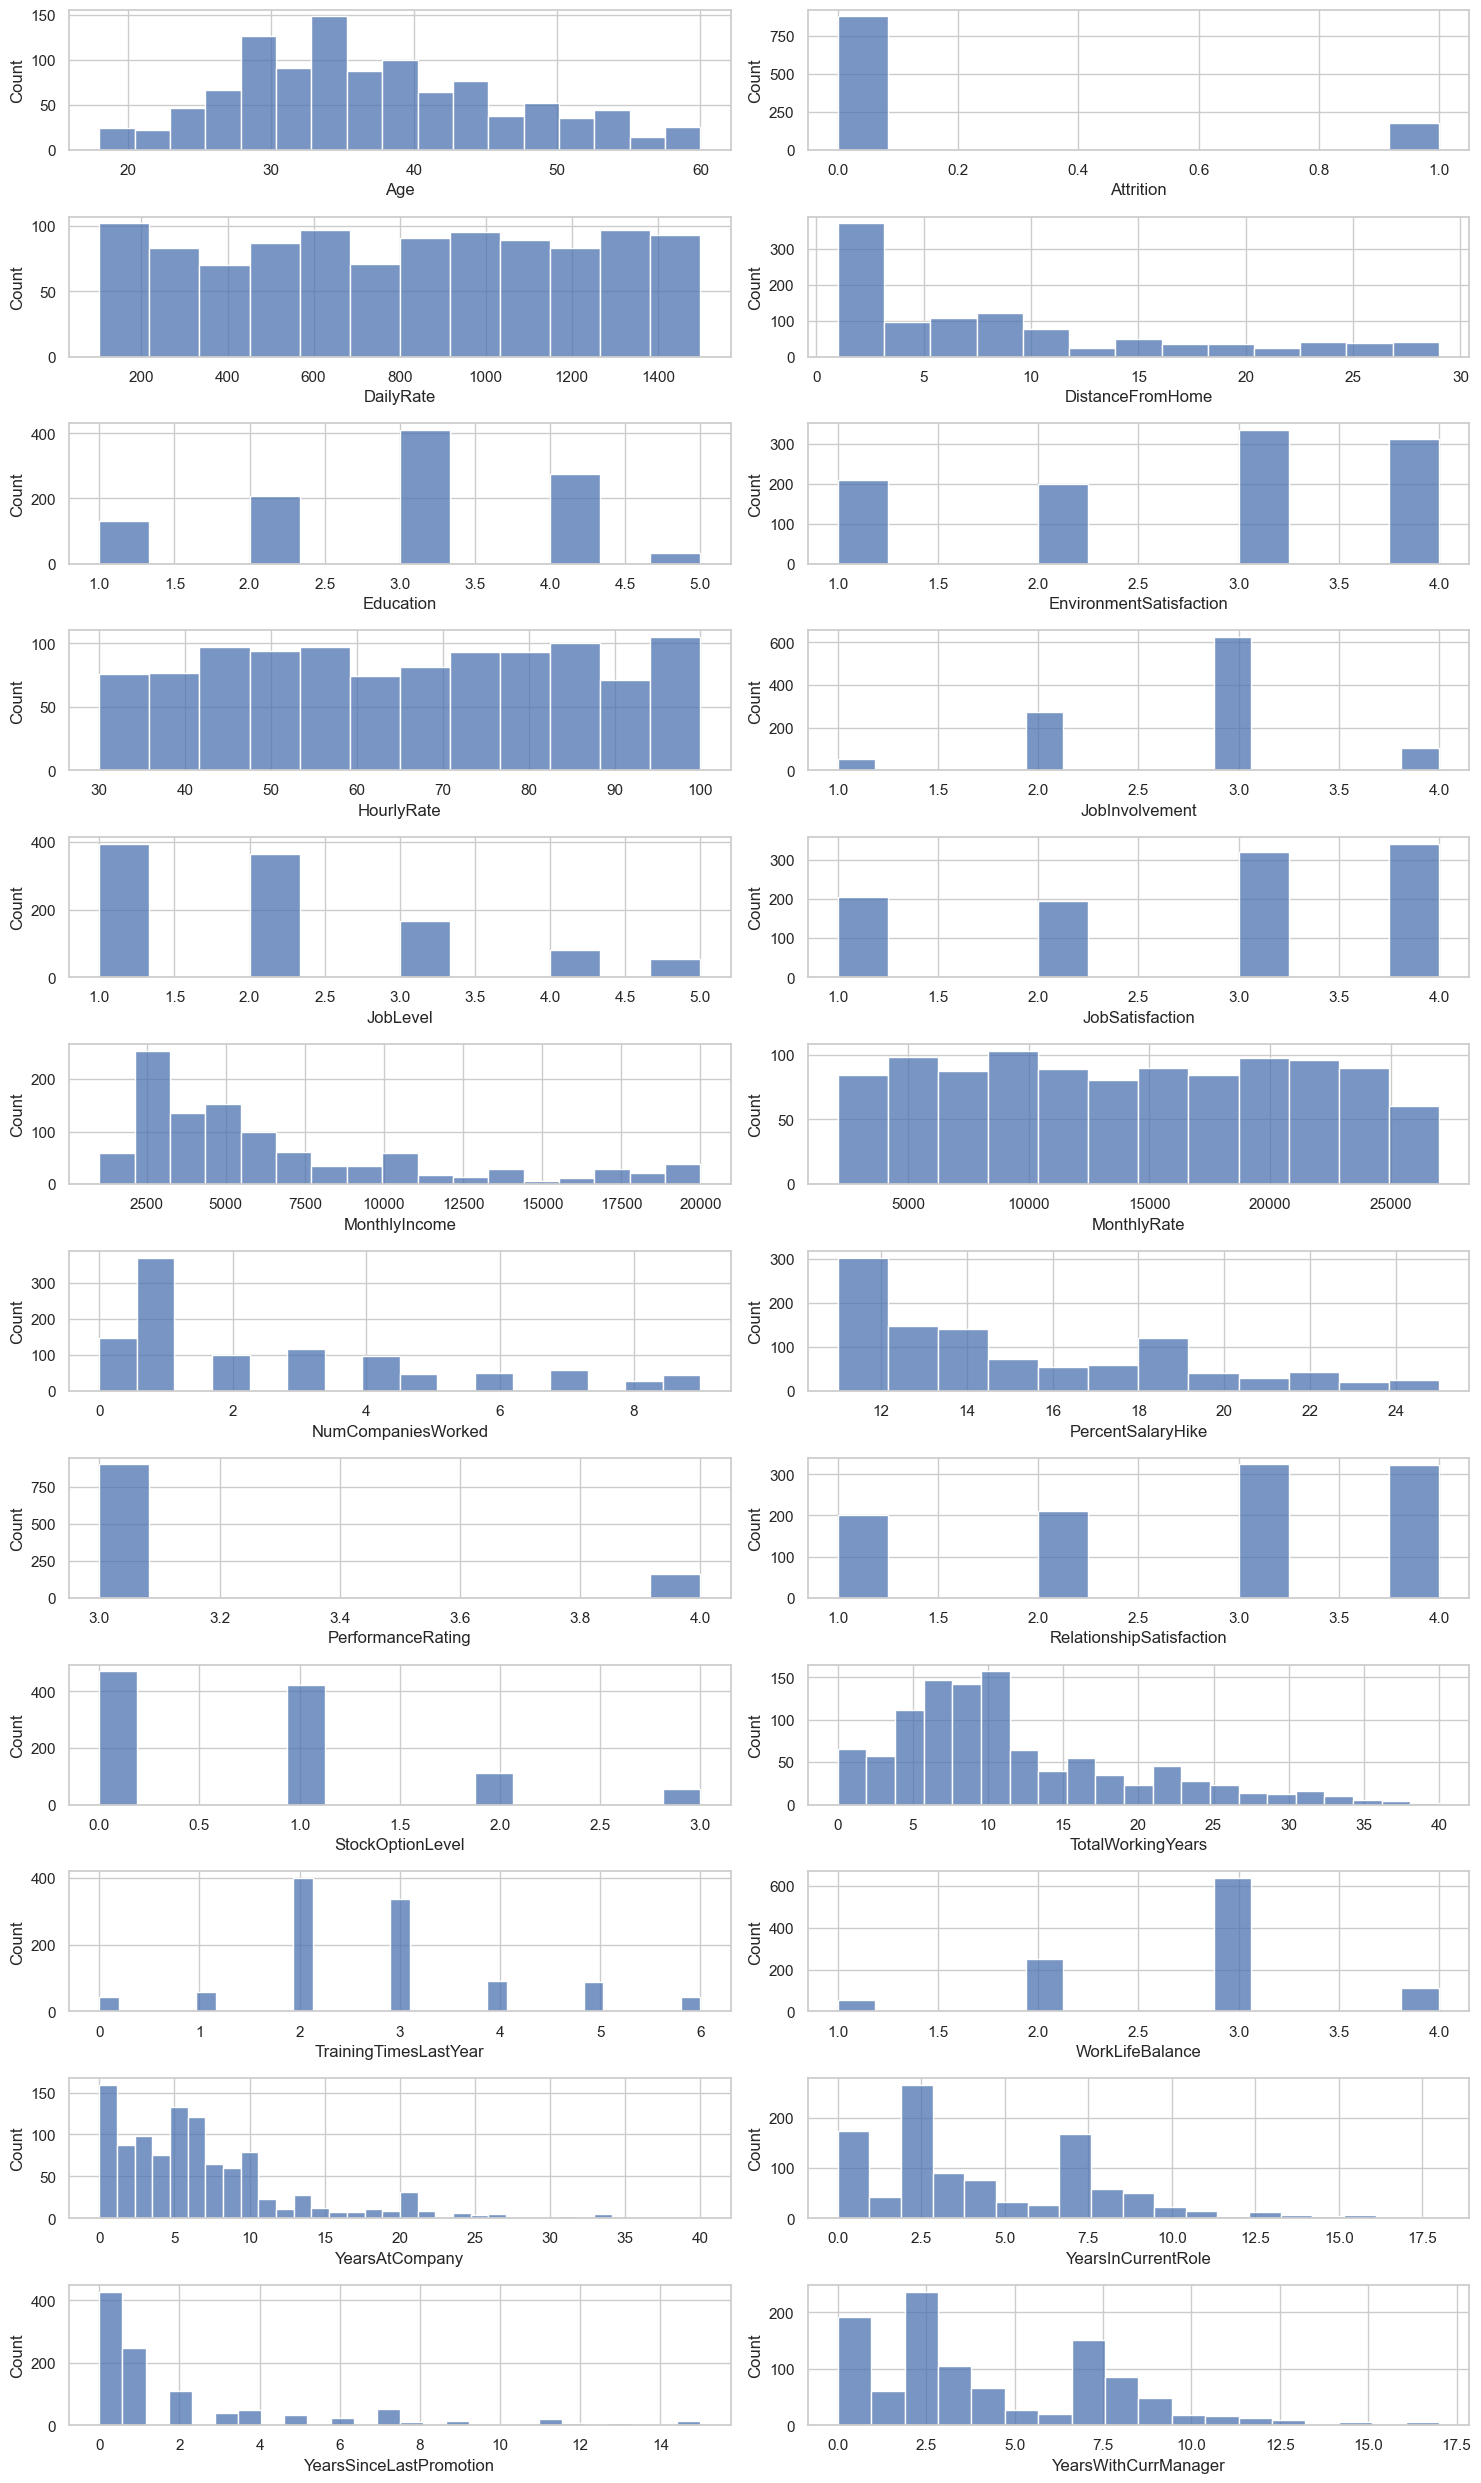

In [15]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(number_column):
    plt.subplot(12, 2, idx + 1)
    sns.histplot(x = i, data = df)
    plt.xlabel(i, size = 12)

plt.tight_layout()
plt.show()

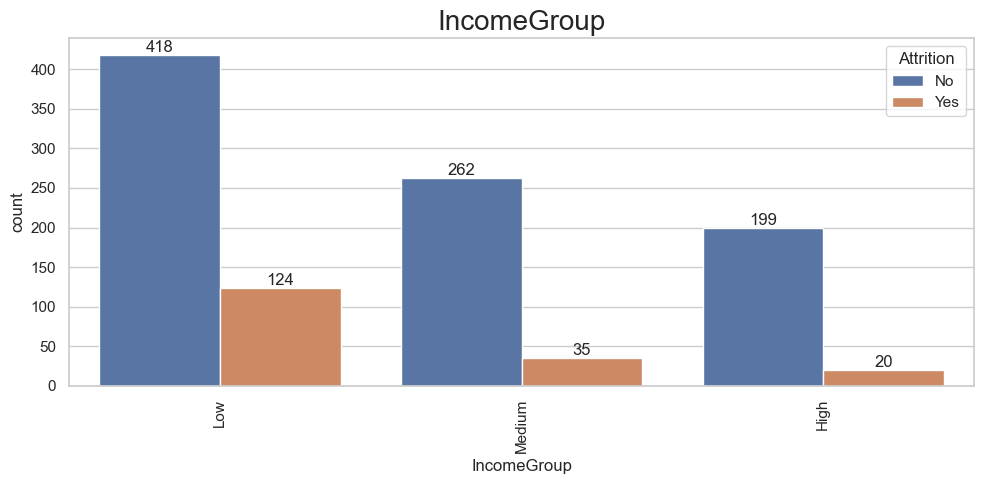

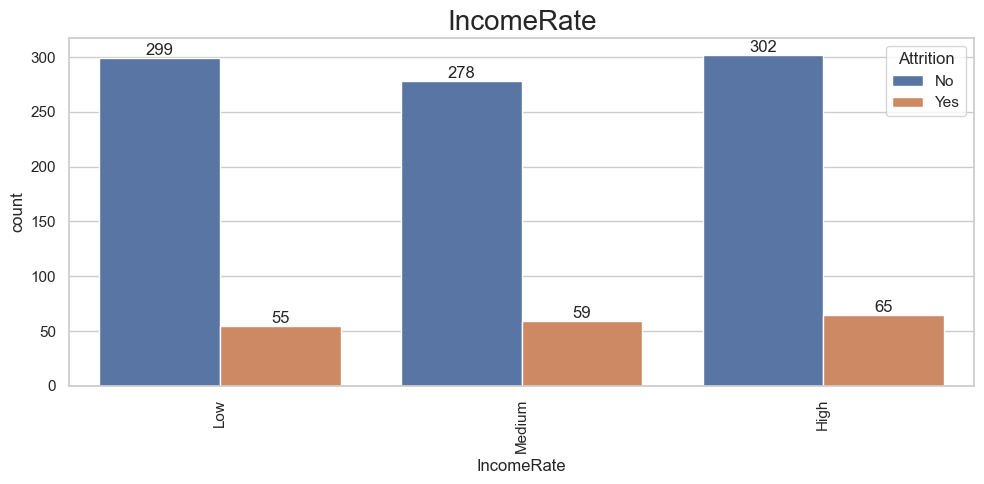

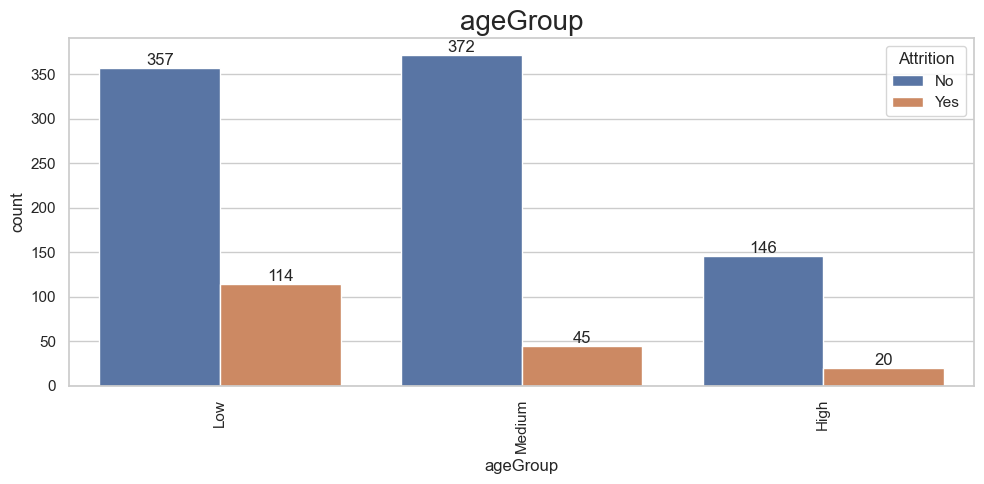

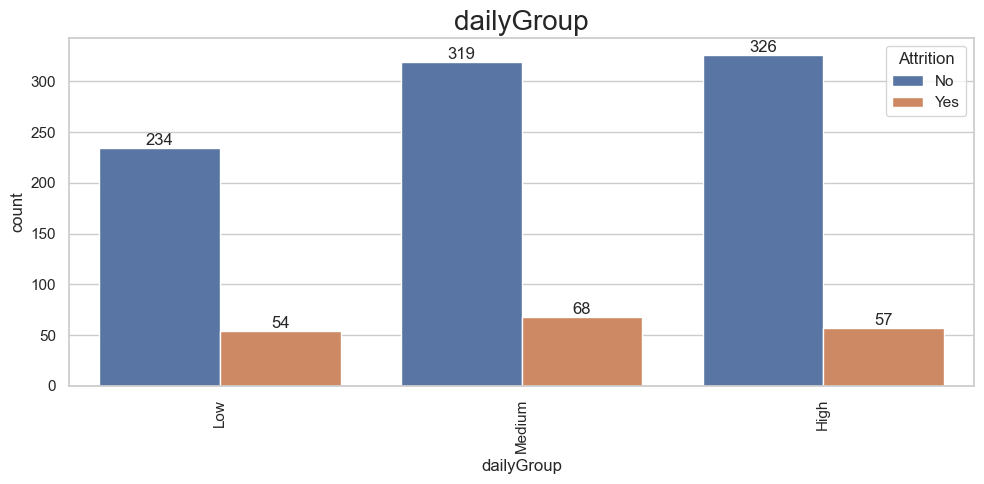

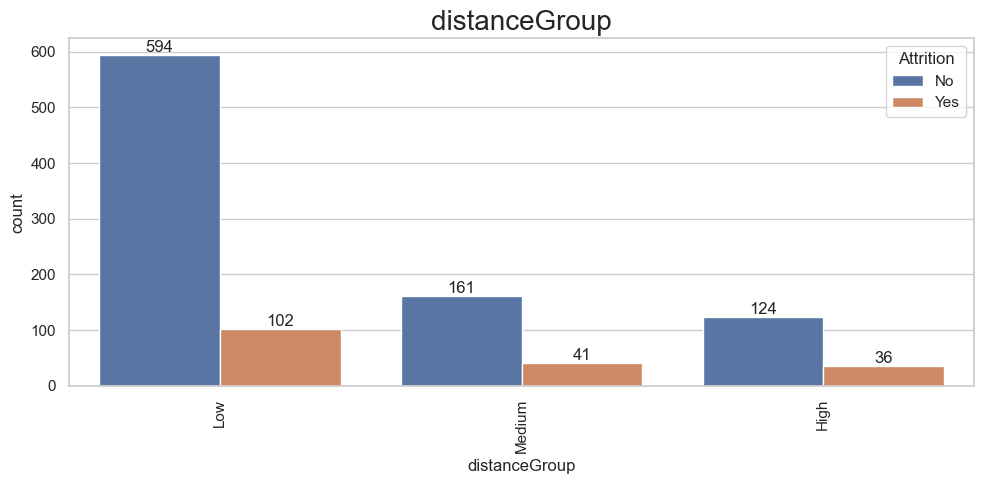

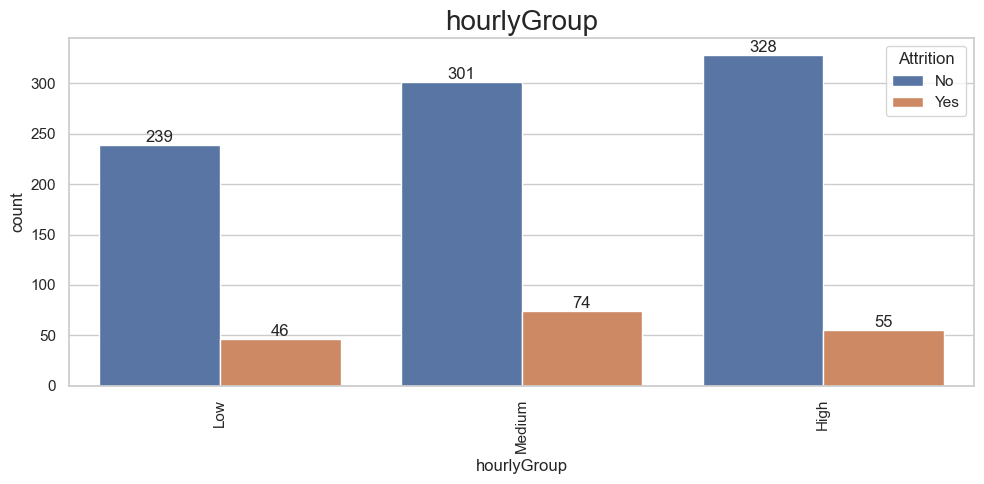

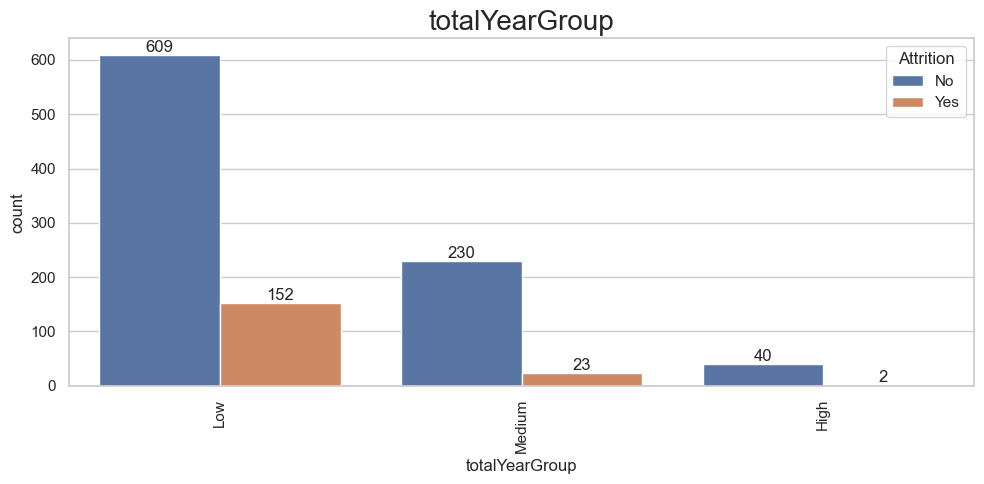

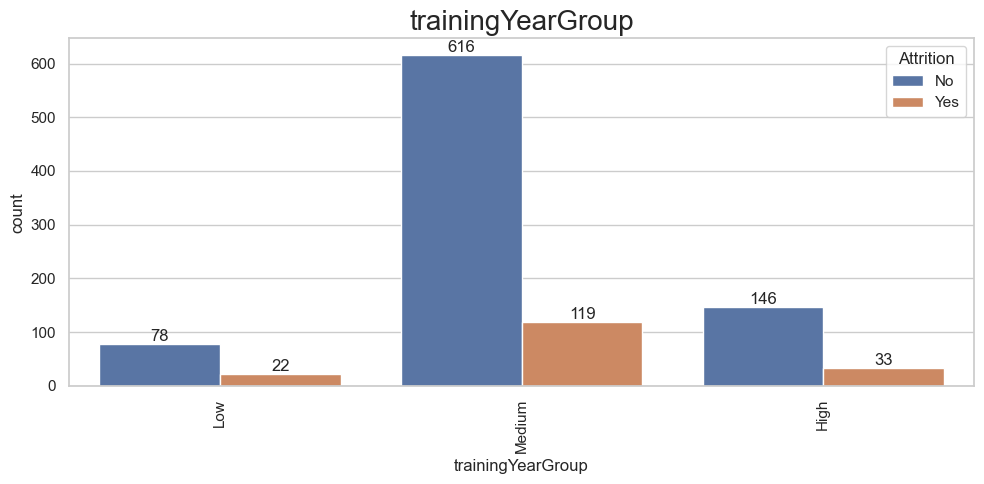

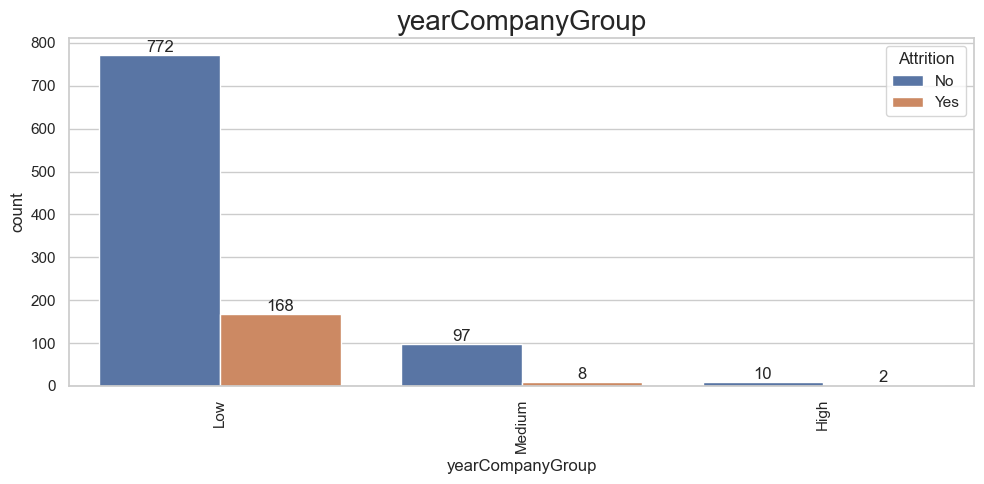

In [16]:
sns.set_theme(style = 'whitegrid')

for col in grouped_data:

    fig, ax = plt.subplots(figsize = (10, 5))
    
    ax = sns.countplot(x = data[col], data = data, hue = "Attrition", ax = ax)
    
    for container in ax.containers:
        ax.bar_label(container)
    
    ax.set_title(col, fontsize = 20)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


    labels  =  ['No', 'Yes']
    ax.legend(labels = labels, title = 'Attrition')
    
    
    plt.tight_layout()
    plt.show()

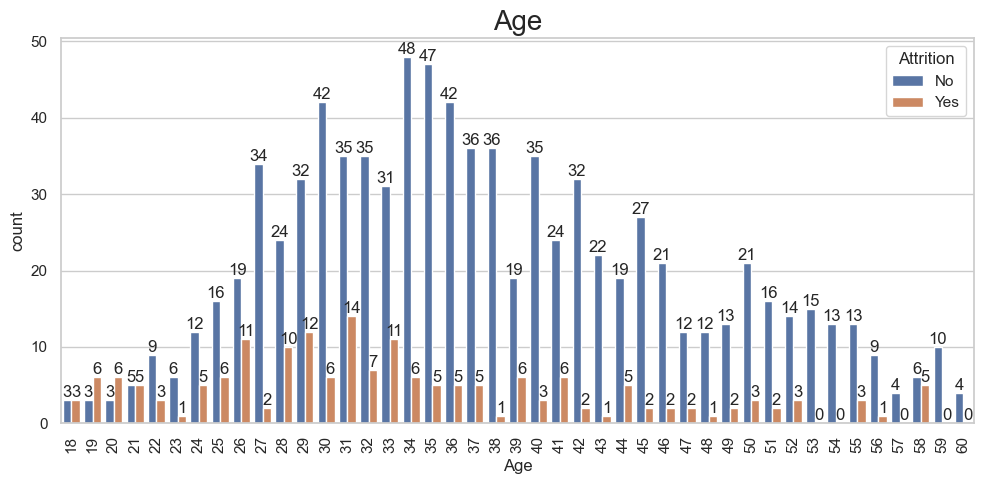

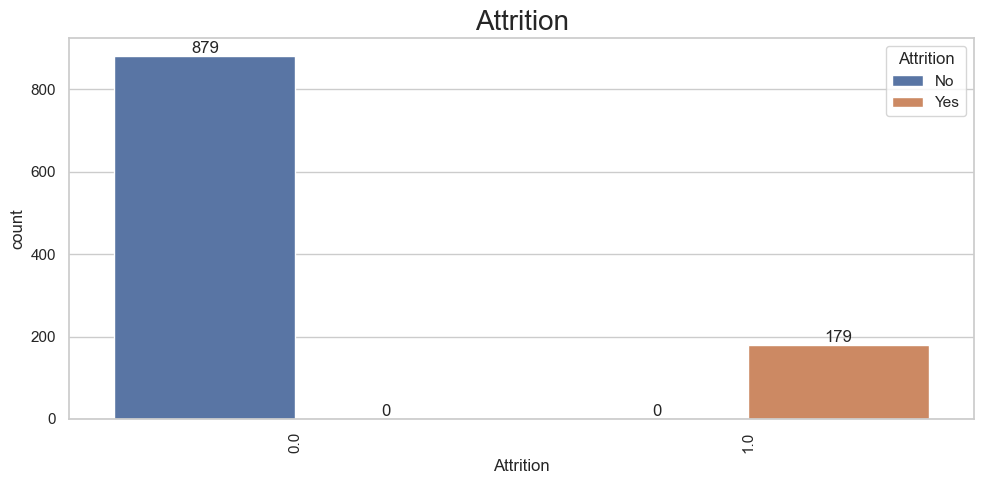

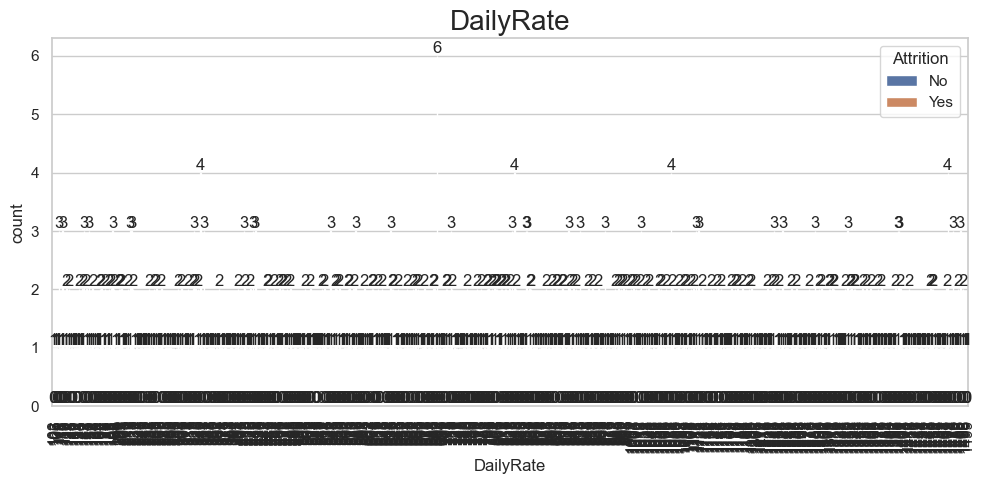

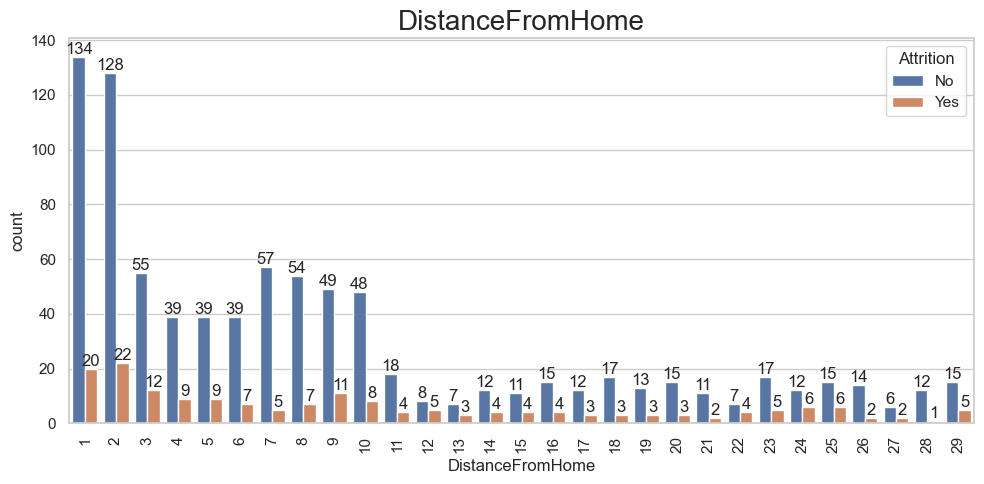

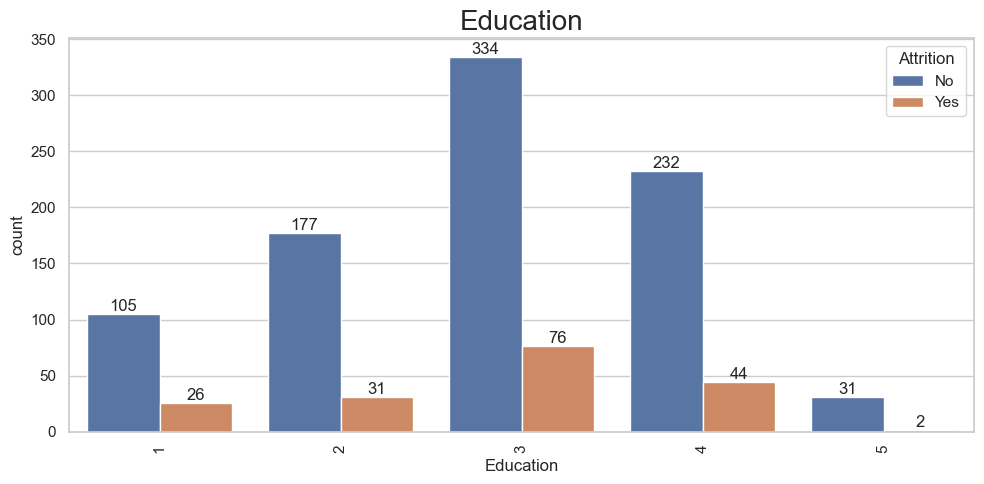

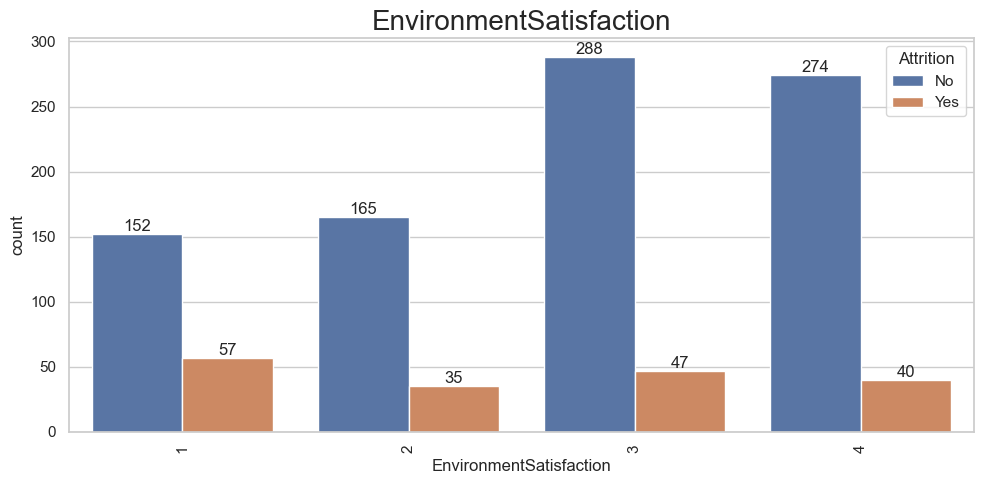

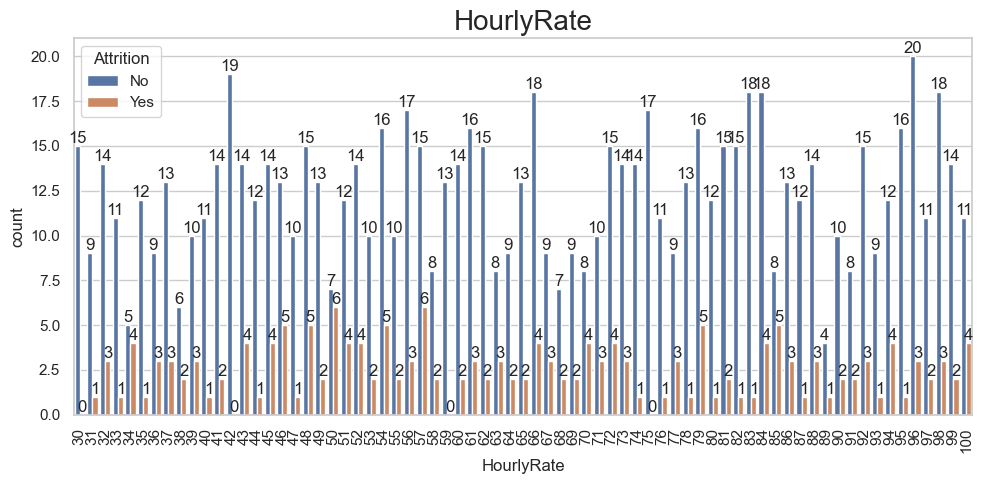

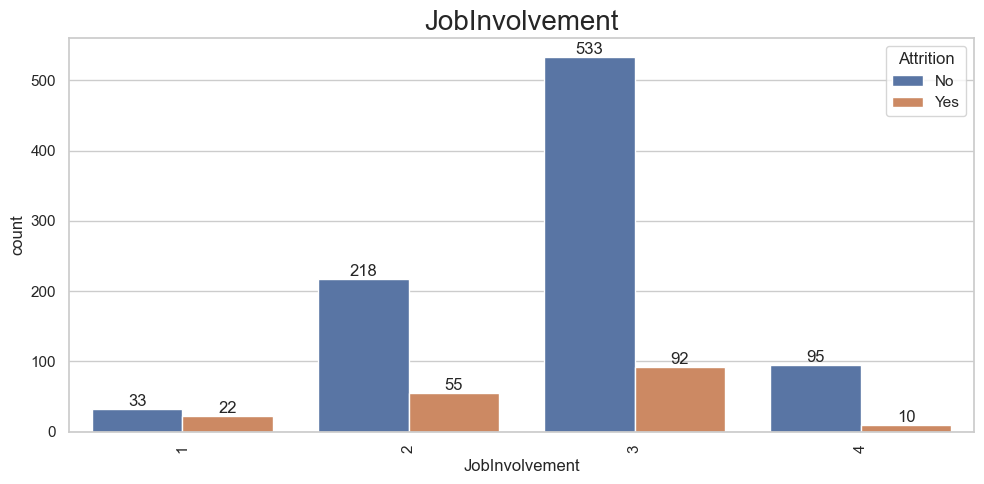

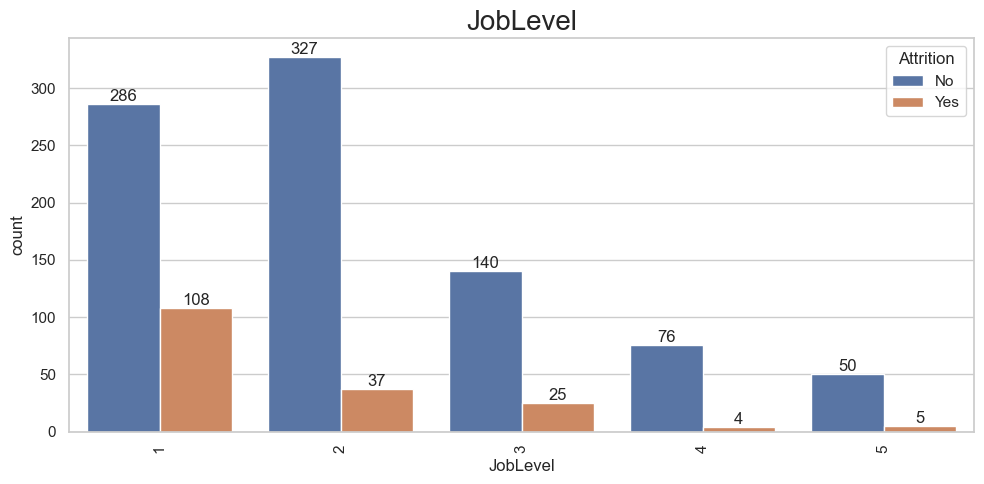

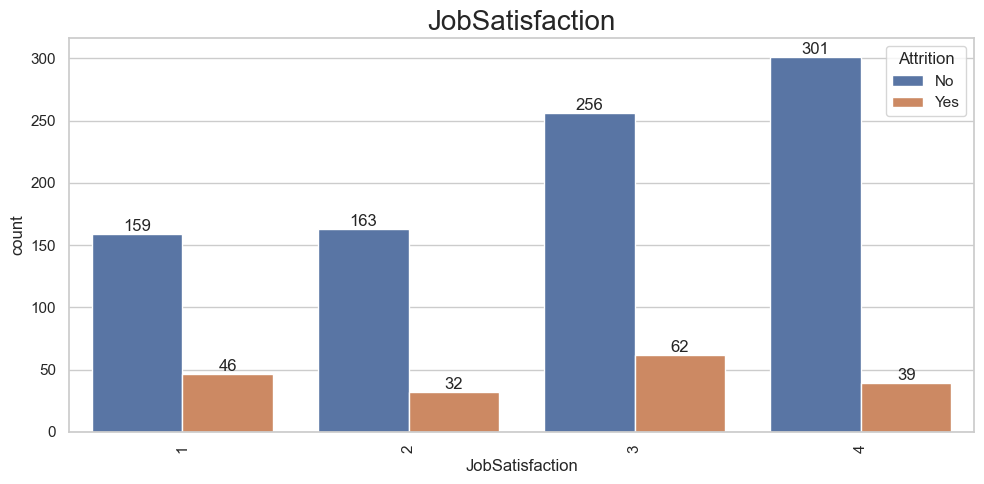

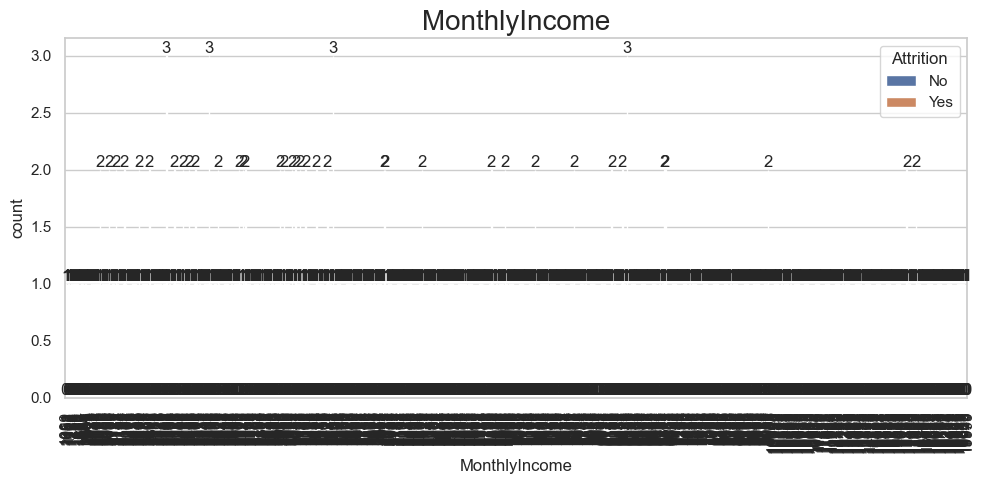

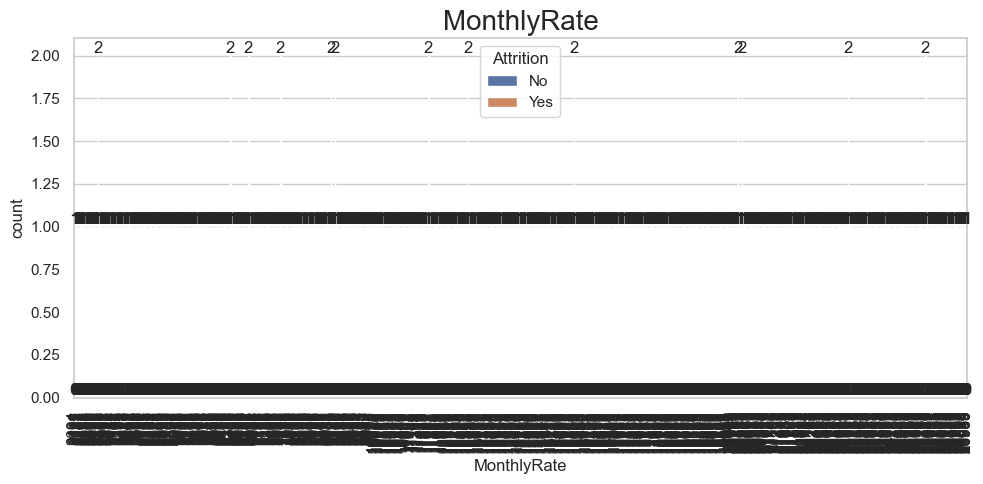

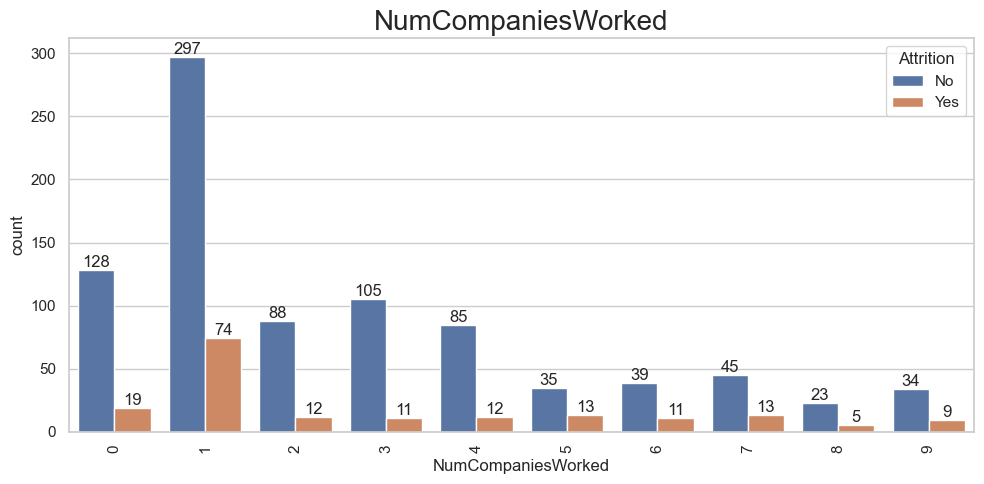

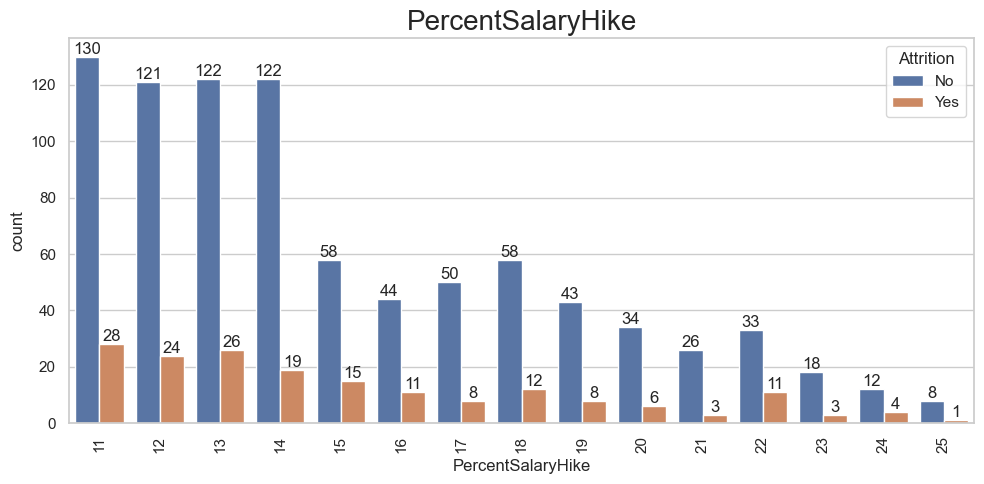

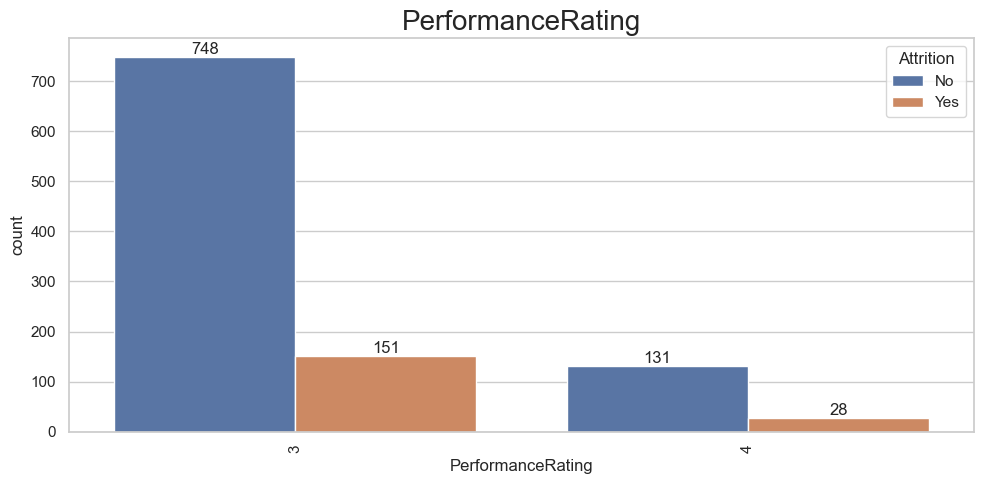

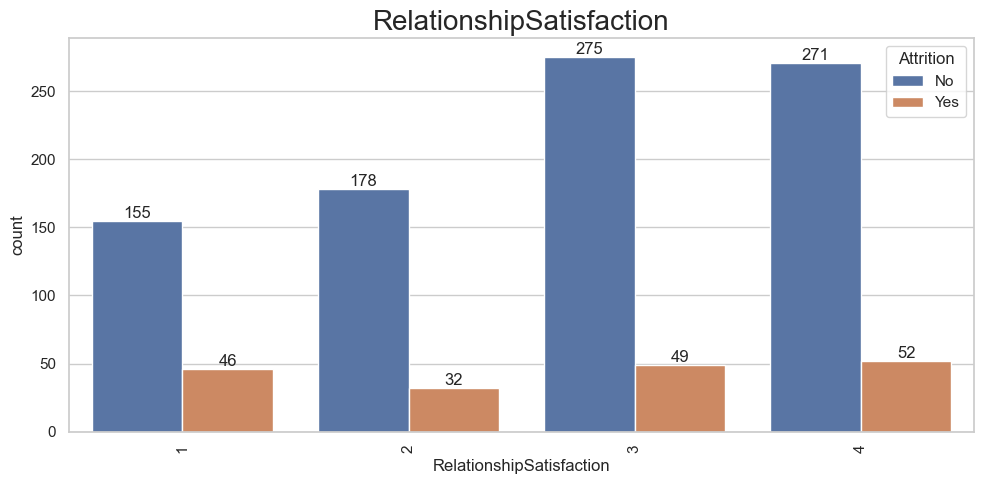

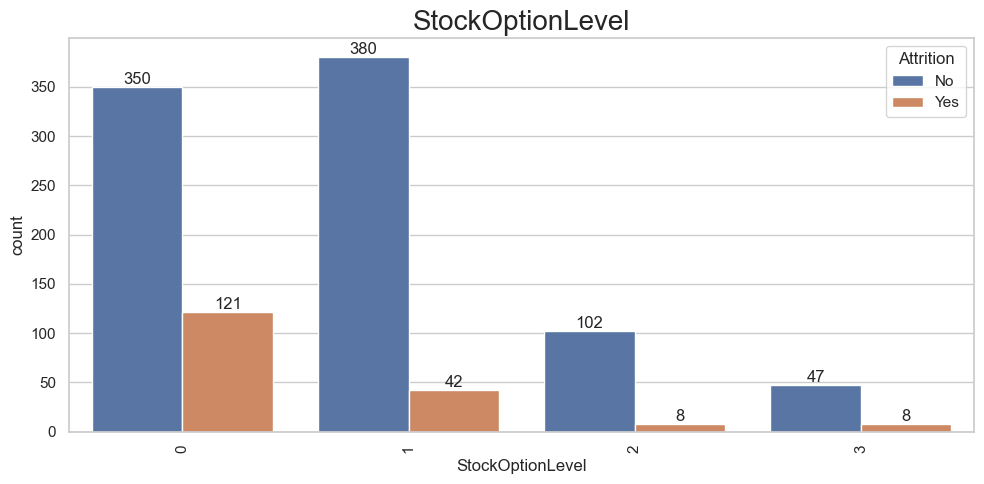

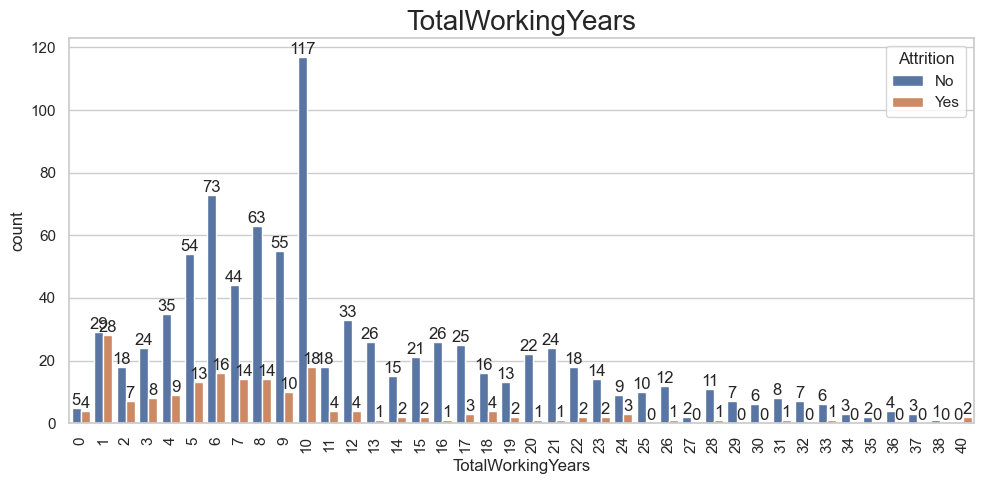

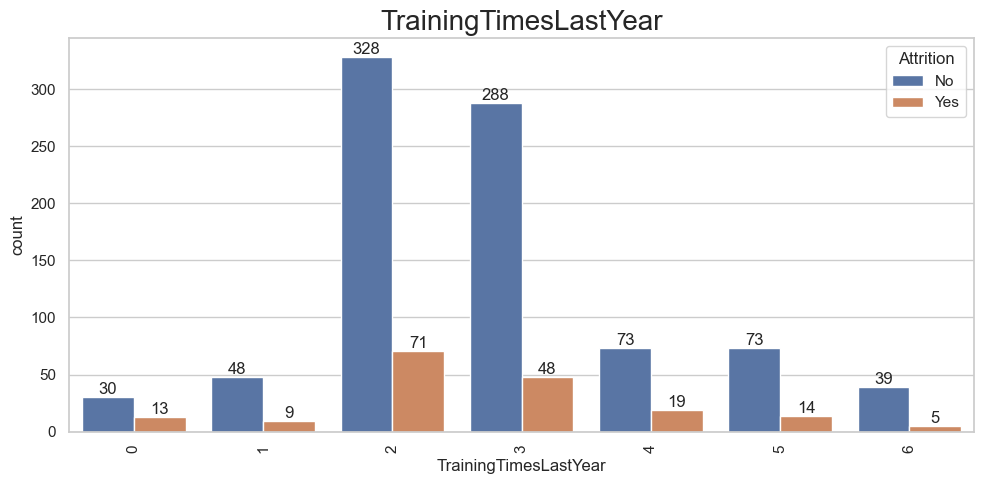

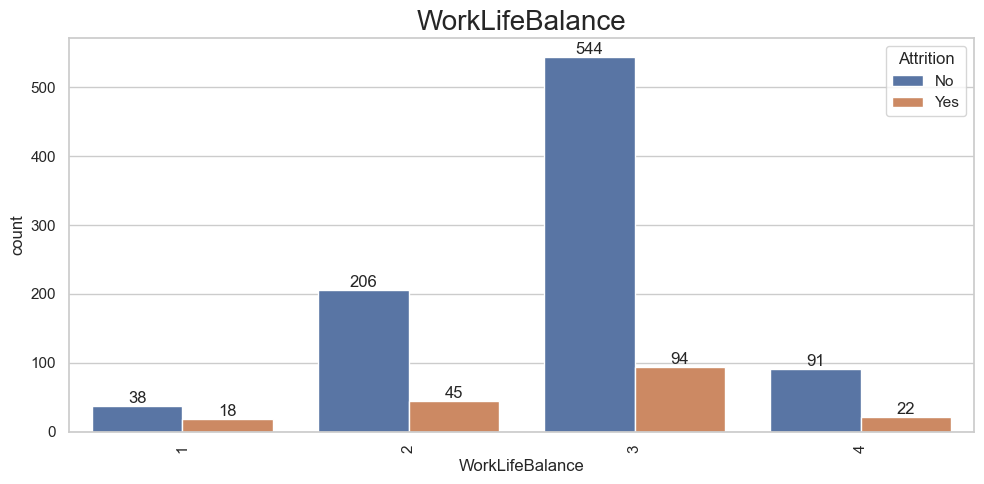

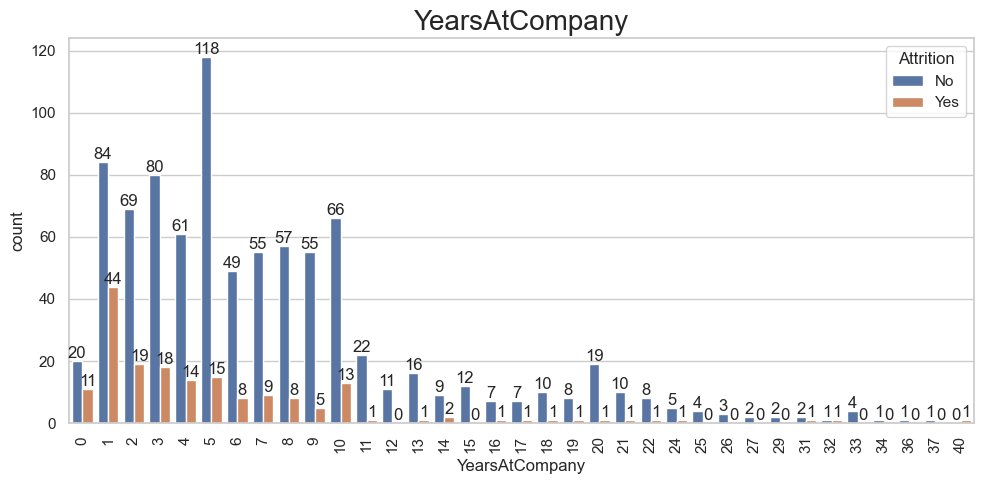

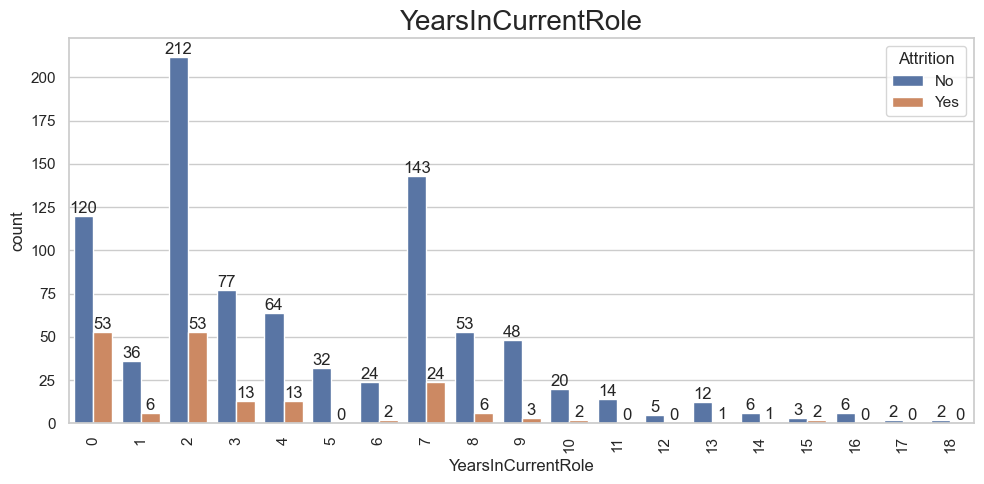

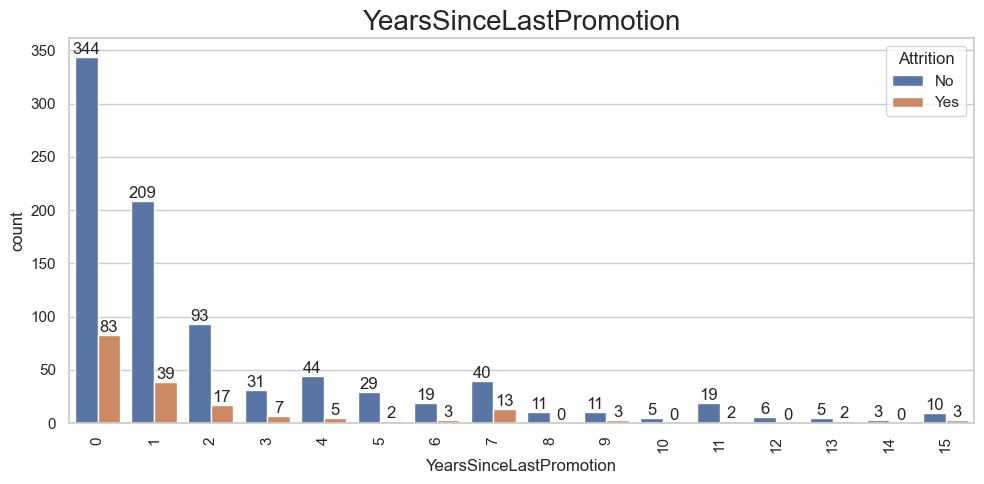

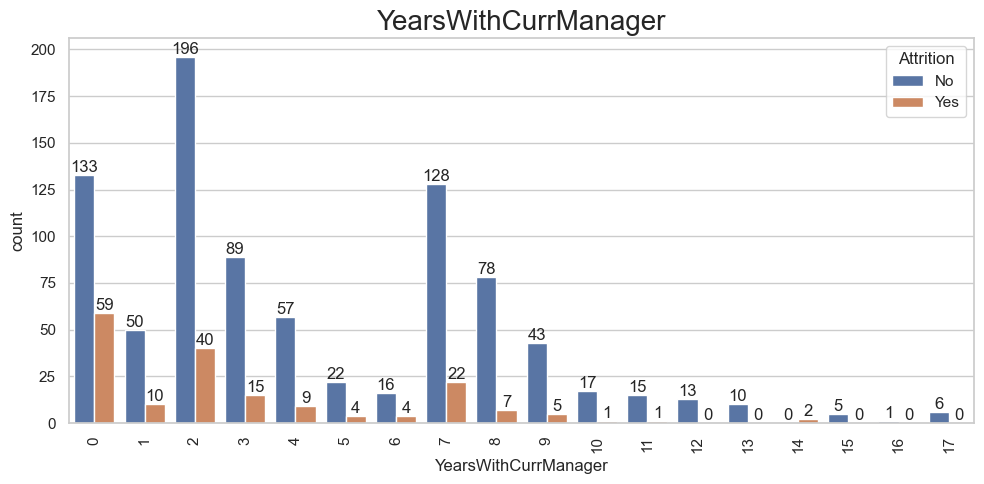

In [17]:
sns.set_theme(style = 'whitegrid')

for col in number_column:
    fig, ax = plt.subplots(figsize = (10, 5))
    
    ax = sns.countplot(x = df[col], data = df, hue = "Attrition", ax = ax)
    
    for container in ax.containers:
        ax.bar_label(container)
    
    ax.set_title(col, fontsize = 20)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

    labels  =  ['No', 'Yes']
    ax.legend(labels = labels, title = 'Attrition')
    
    
    plt.tight_layout()
    plt.show()

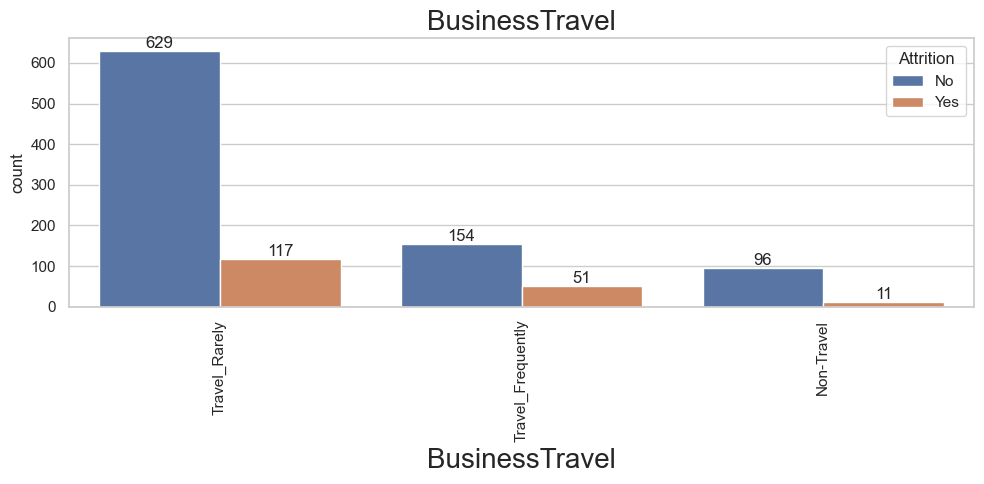

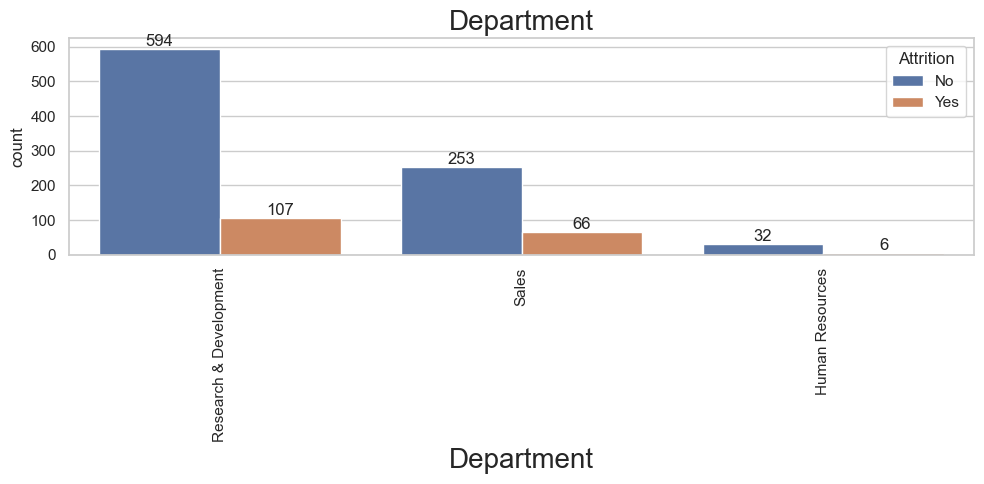

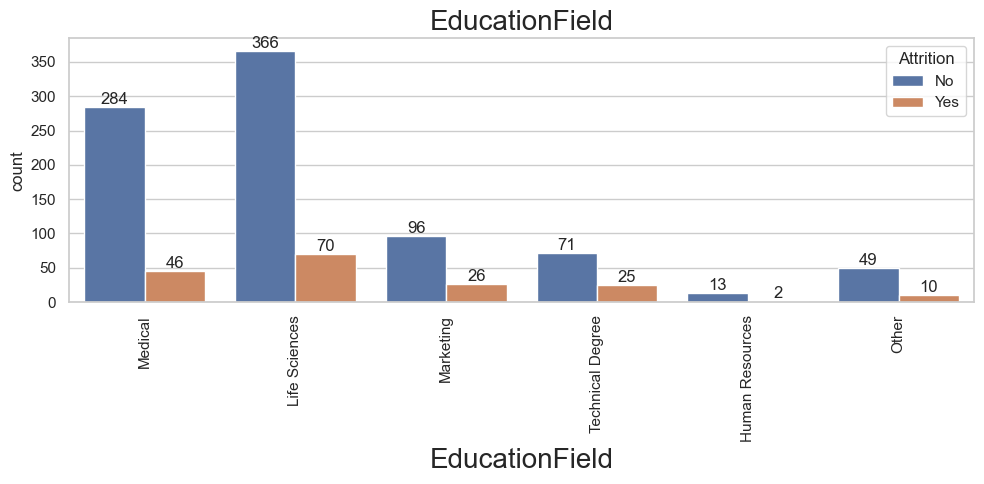

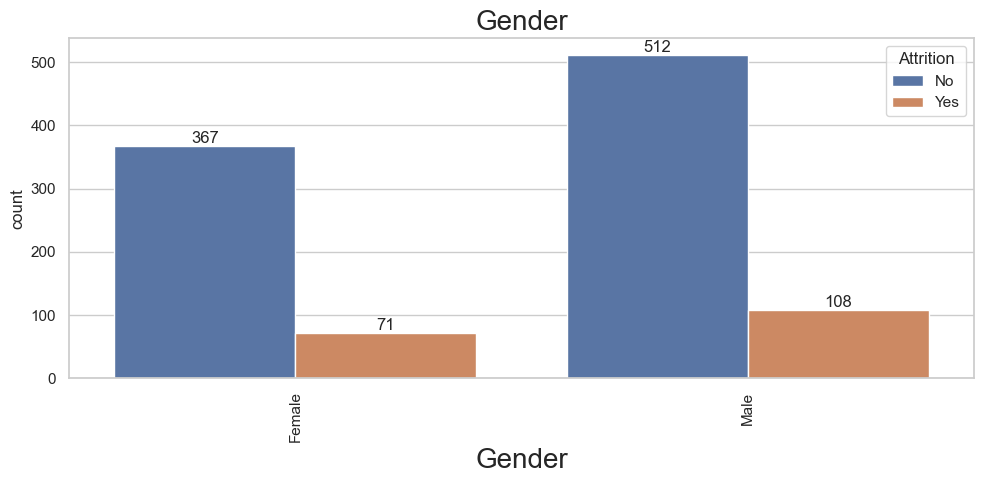

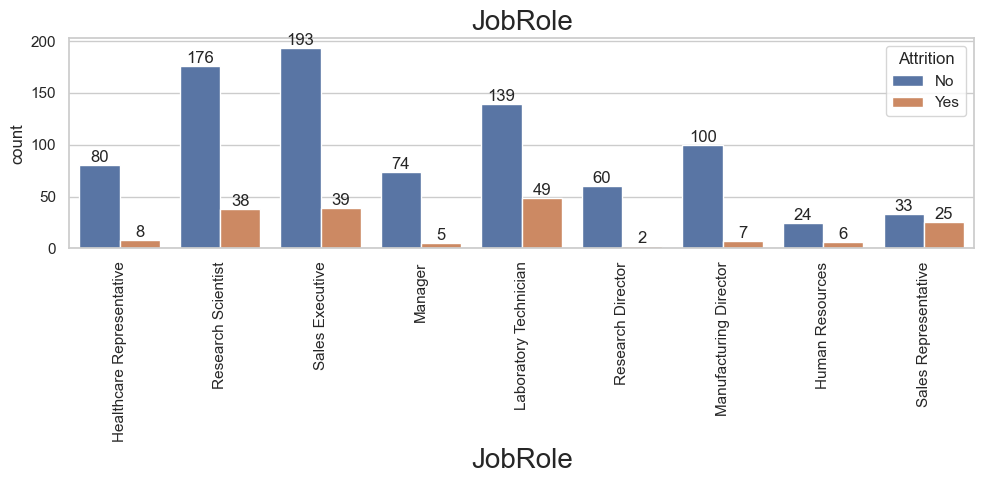

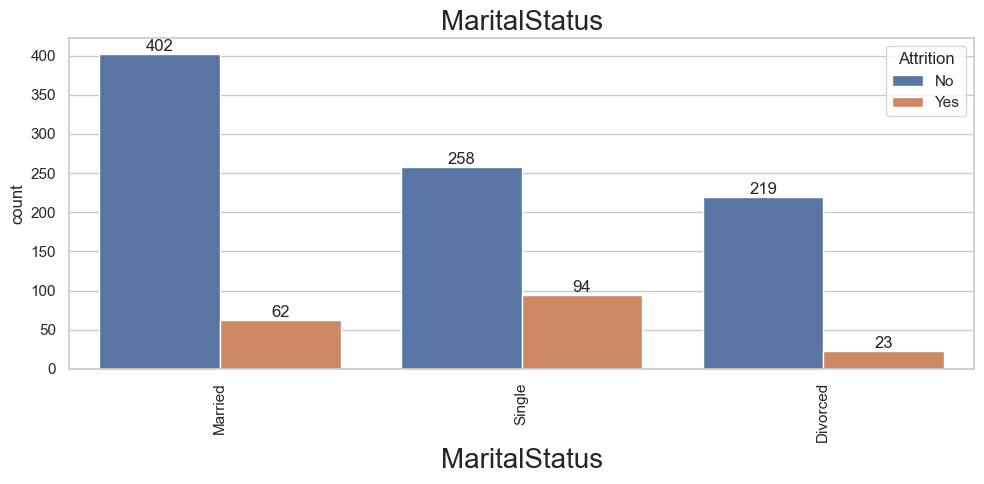

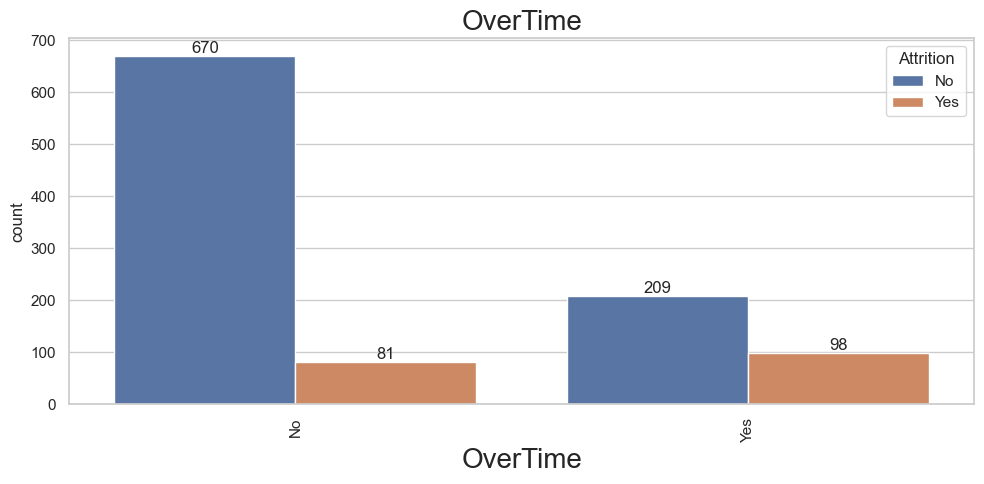

In [18]:
sns.set_theme(style = 'whitegrid')

for col in categorical_column:
    fig, ax = plt.subplots(figsize = (10, 5))
    
    ax = sns.countplot(x = df[col], data = df, hue = "Attrition", ax = ax)
    
    for container in ax.containers:
        ax.bar_label(container)
    
    ax.set_title(col, fontsize = 20)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    ax.set_xlabel(col, fontsize = 20)

    labels  =  ['No', 'Yes']
    ax.legend(labels = labels, title = 'Attrition')
    
    
    plt.tight_layout()
    plt.show()

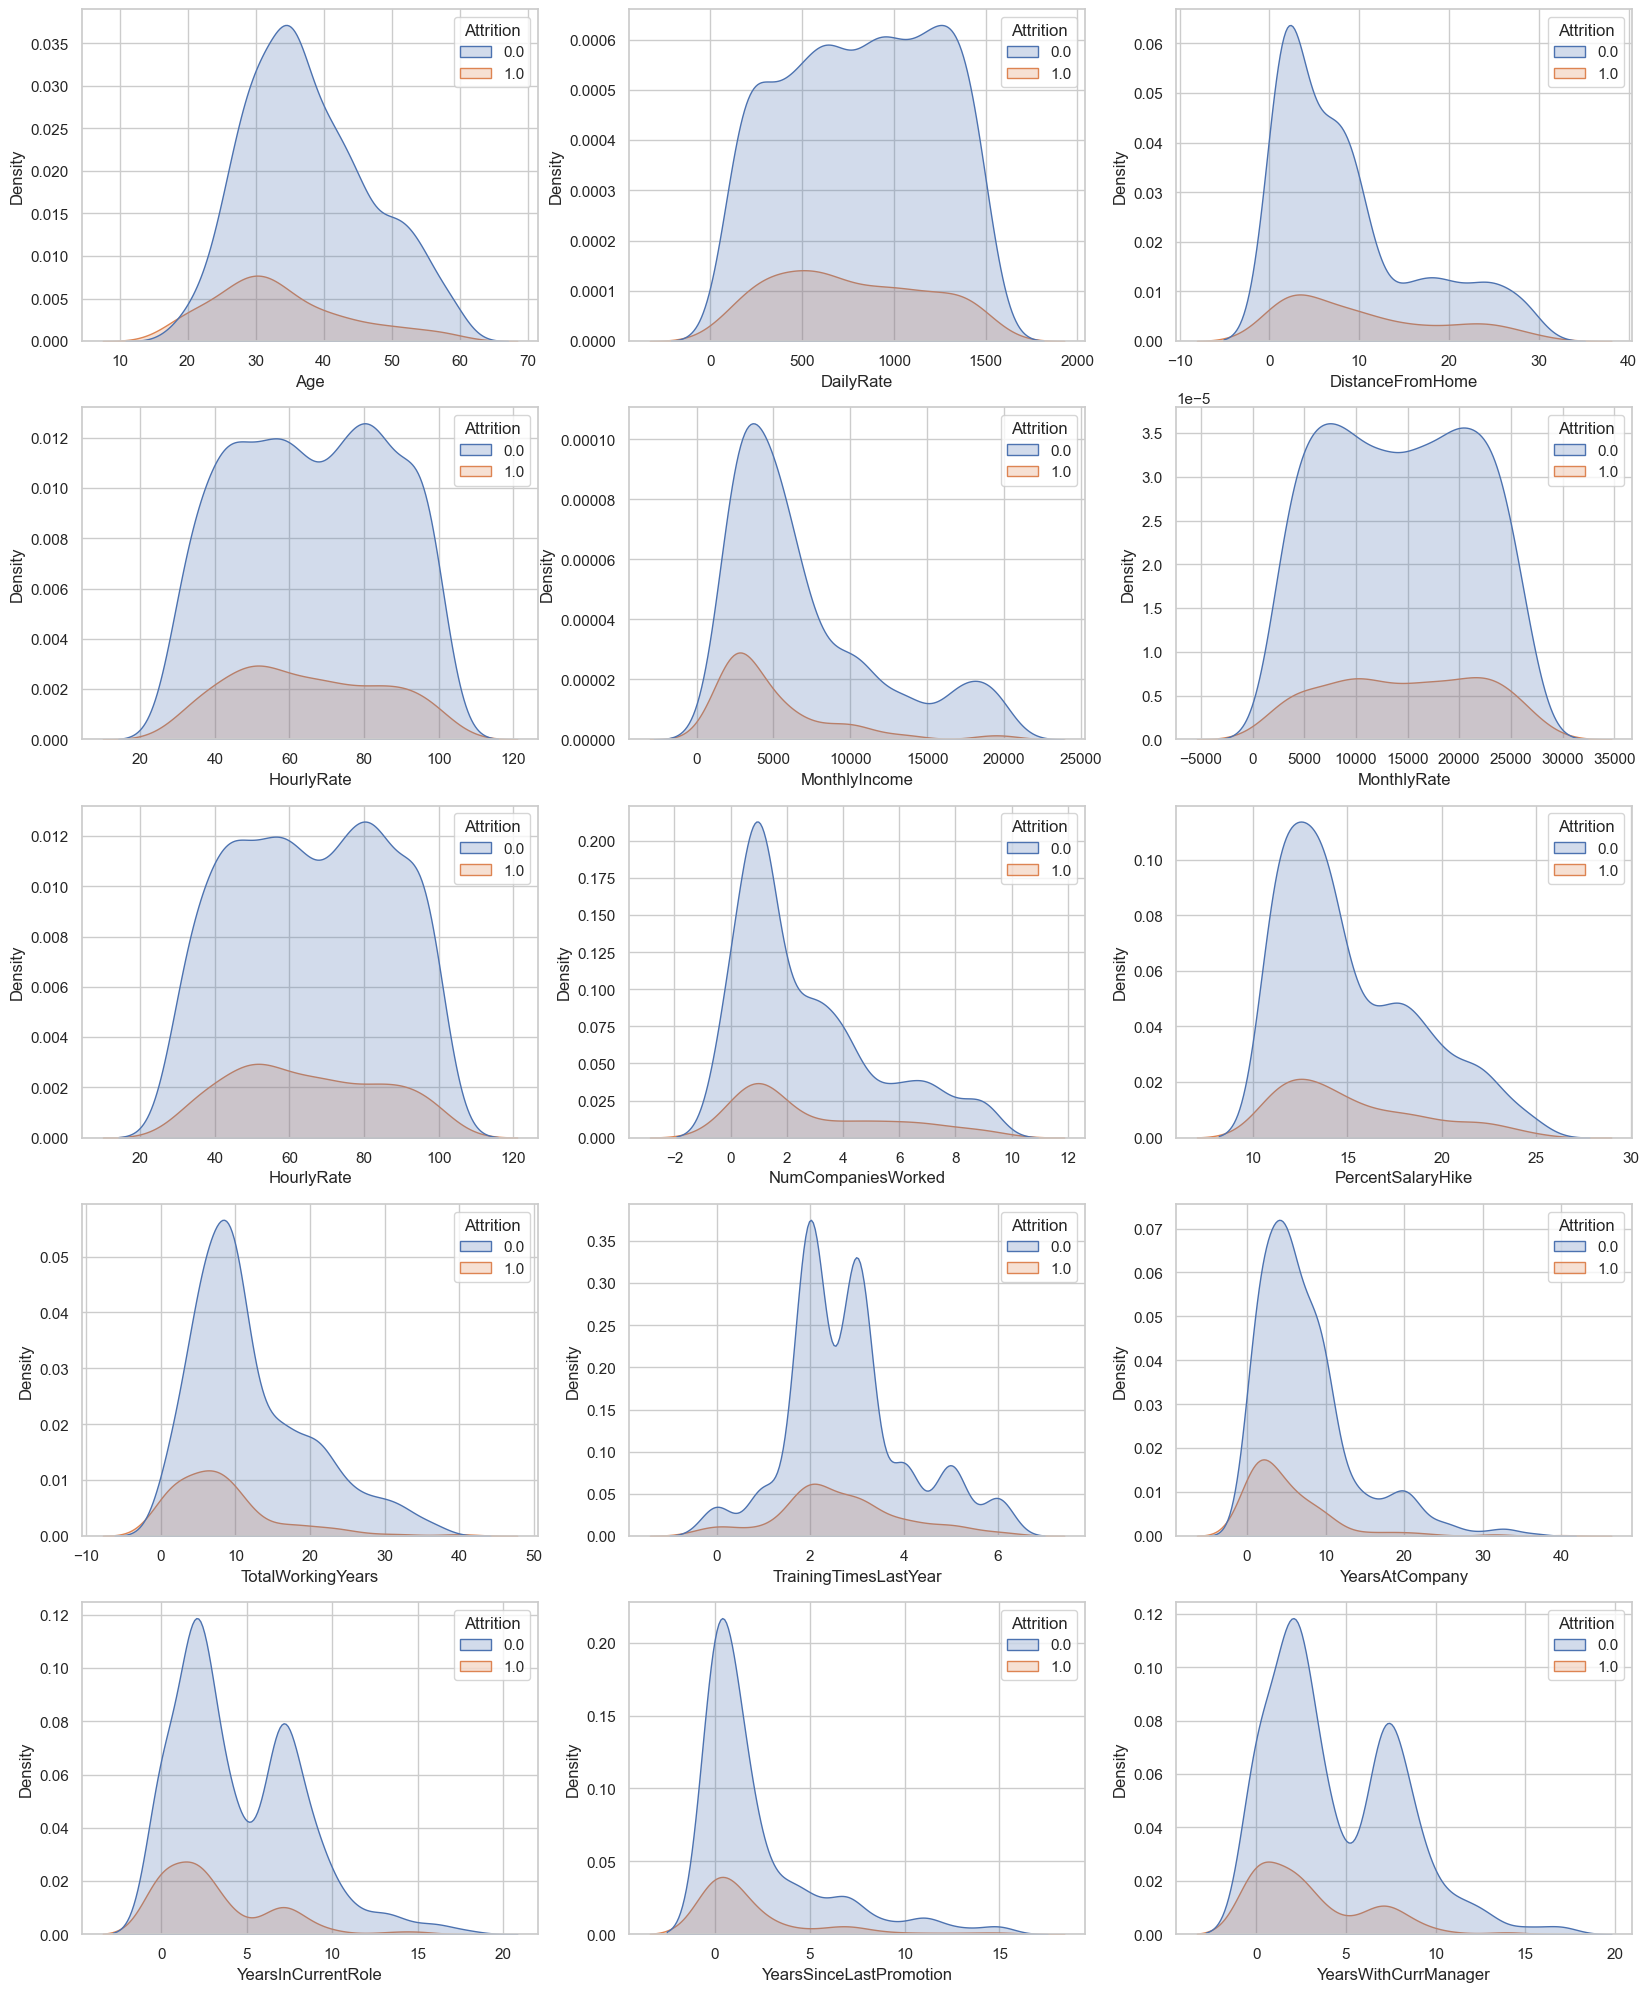

In [19]:
number_column = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate",
            "HourlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears",
            "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
            "YearsWithCurrManager"]

categorical_column = df.drop(['Attrition'], axis = 1).columns.difference(number_column)

fig, ax  =  plt.subplots(5, 3, figsize = (20, 5*5))
for i, col in enumerate(number_column):
    sns.kdeplot(data = df, x = col, fill = True, ax = ax[i // 3][i % 3], hue = 'Attrition')

## Data Transformation

In [20]:
df['Attrition'] = df['Attrition'].astype(int)

department_mapping = {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
df['Department'] = df['Department'].map(department_mapping)

business_travel_mapping = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

eduation_mapping = {'Other': 0, 'Medical': 1, 'Life Sciences': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
df['EducationField'] = df['EducationField'].map(eduation_mapping)

gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

MaritalStatus_Mapping = {'Married': 0, 'Single': 1, 'Divorced': 2}
df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_Mapping)

overTime_mapping = {'No': 0, 'Yes': 1}
df['OverTime'] = df['OverTime'].map(overTime_mapping)

encoder = LabelEncoder()
df['JobRole'] = encoder.fit_transform(df['JobRole'])

In [21]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,1,1141,1,11,2,1,1,1,...,3,1,0,15,2,1,1,0,0,0
2,51,1,1,1323,1,4,4,2,1,0,...,3,3,3,18,2,4,10,0,2,7
3,42,0,2,555,2,26,3,3,3,1,...,3,4,1,23,2,4,20,4,4,8
6,40,0,1,1124,2,1,2,1,2,0,...,4,3,3,6,2,2,4,3,0,2
7,55,1,1,725,1,2,3,1,4,0,...,3,4,1,24,2,3,5,2,1,4
8,36,0,2,635,1,18,1,1,2,1,...,3,1,0,8,2,3,8,1,1,7
9,32,0,1,1018,1,3,2,2,3,1,...,3,4,0,10,6,3,7,7,7,7
10,25,0,1,583,2,4,1,3,3,0,...,3,1,0,5,1,4,5,2,0,3
11,20,1,1,129,1,4,3,4,1,0,...,3,2,0,1,2,3,1,0,0,0
13,42,0,1,810,1,23,5,2,1,1,...,3,2,0,16,2,3,1,0,0,0


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1058 non-null   int64
 1   Attrition                 1058 non-null   int32
 2   BusinessTravel            1058 non-null   int64
 3   DailyRate                 1058 non-null   int64
 4   Department                1058 non-null   int64
 5   DistanceFromHome          1058 non-null   int64
 6   Education                 1058 non-null   int64
 7   EducationField            1058 non-null   int64
 8   EnvironmentSatisfaction   1058 non-null   int64
 9   Gender                    1058 non-null   int64
 10  HourlyRate                1058 non-null   int64
 11  JobInvolvement            1058 non-null   int64
 12  JobLevel                  1058 non-null   int64
 13  JobRole                   1058 non-null   int32
 14  JobSatisfaction           1058 non-null   int

## EDA

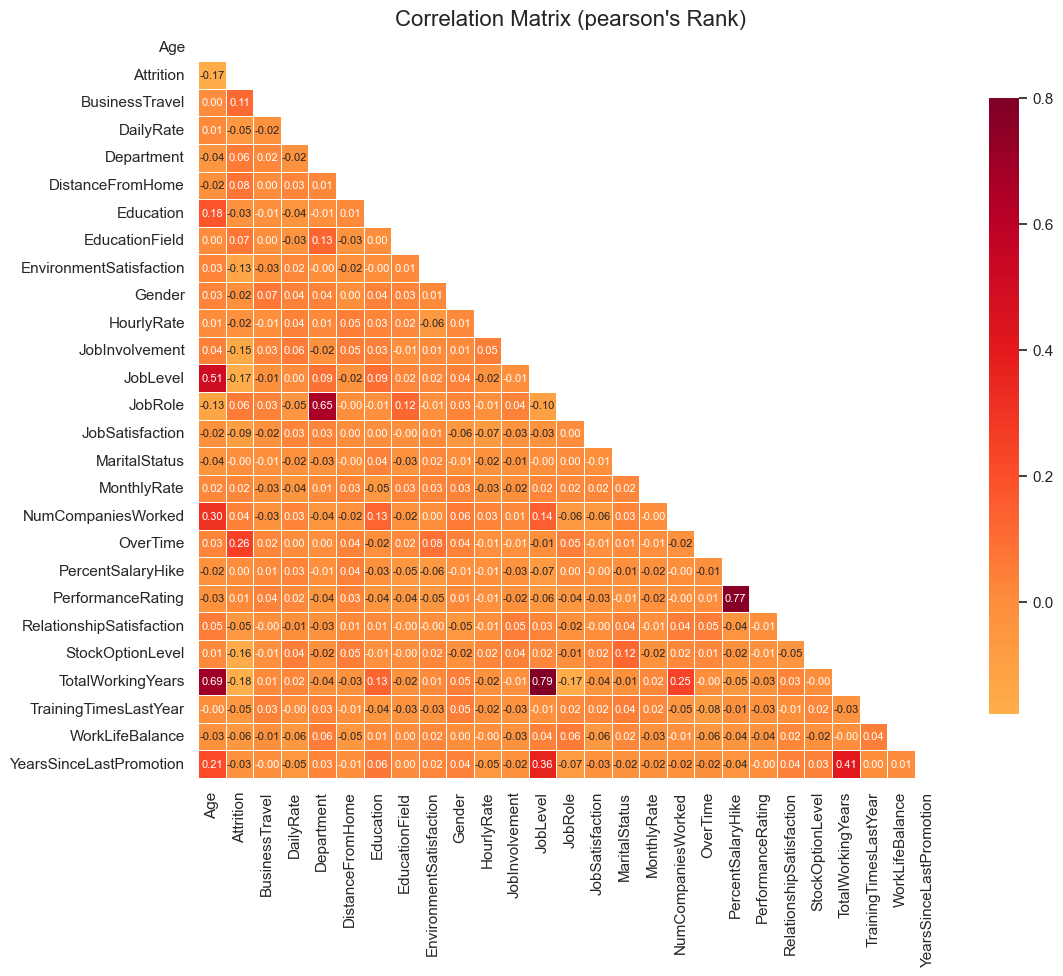

In [37]:
sns.set(style = "white")

corr = df.corr(method = "pearson")

mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap = "YlOrRd", vmax = 0.8, center = 0, square = True, 
            linewidths = 0.7, cbar_kws = {"shrink": 0.8}, annot = True, fmt = ".2f", annot_kws = {"size": 8})

plt.title("Correlation Matrix (pearson's Rank)", fontsize = 16)

plt.show()

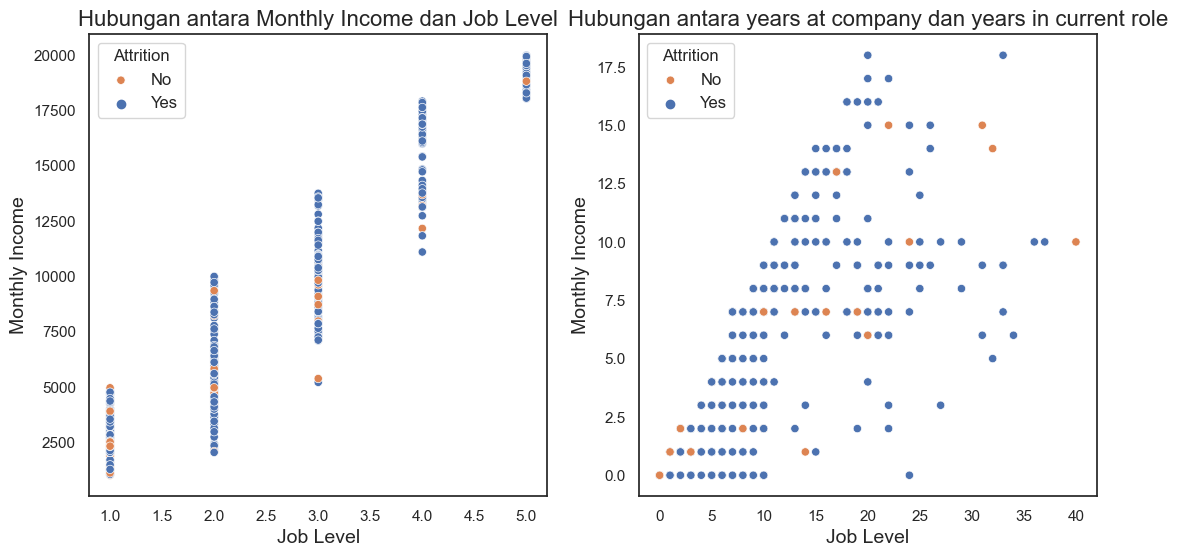

In [24]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.scatterplot(x = 'JobLevel', y = 'MonthlyIncome', data = df, hue = 'Attrition')
plt.title('Hubungan antara Monthly Income dan Job Level', fontsize = 16)
plt.xlabel('Job Level', fontsize = 14)
plt.ylabel('Monthly Income', fontsize = 14)

plt.legend(title = 'Attrition', loc = 'upper left', fontsize = 12, labels = ['No', 'Yes'])

plt.subplot(1,2,2)
sns.scatterplot(x = 'YearsAtCompany', y = 'YearsInCurrentRole', data = df, hue = 'Attrition')
plt.title('Hubungan antara years at company dan years in current role', fontsize = 16)
plt.xlabel('Job Level', fontsize = 14)
plt.ylabel('Monthly Income', fontsize = 14)

plt.legend(title = 'Attrition', loc = 'upper left', fontsize = 12, labels = ['No', 'Yes'])

plt.show()

## Model


In [25]:
df  =  df.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis = 1)

In [26]:
from sklearn import preprocessing
scaler  =  preprocessing.MinMaxScaler(feature_range  =  (0,1))
df1  =  df.drop(columns = ['Attrition'])
norm  =  scaler.fit_transform(df)
norm_df  =  pd.DataFrame(norm,columns = df.columns)

In [27]:
X  =  pd.DataFrame(norm_df.drop(columns = 'Attrition'))
Y  =  pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [28]:
x_train  , x_test , y_train, y_test  =  train_test_split (X ,Y ,test_size  =  0.2 , random_state  =  0)

In [29]:
oversampler = SMOTE(random_state = 0)
smote_train, smote_target  =  oversampler.fit_resample(x_train,y_train)

accuracy 0.9669811320754716


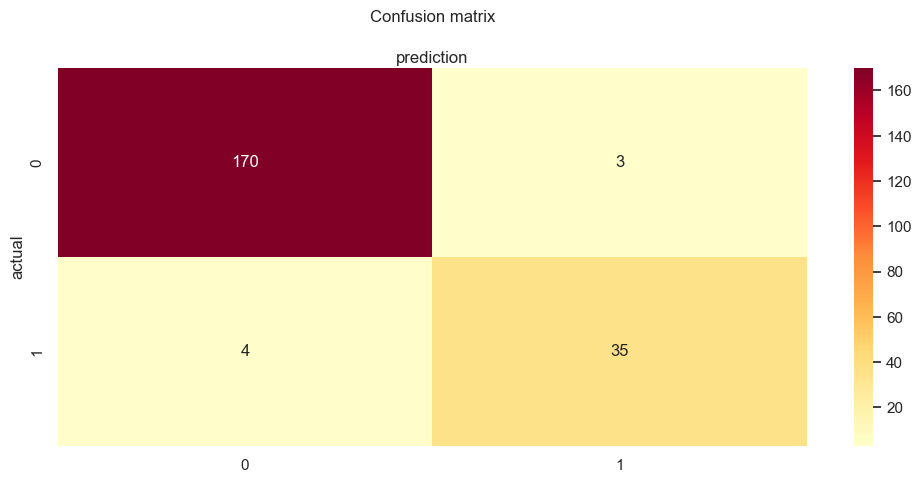

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       173
         1.0       0.92      0.90      0.91        39

    accuracy                           0.97       212
   macro avg       0.95      0.94      0.94       212
weighted avg       0.97      0.97      0.97       212



In [30]:
x_train, x_test, y_train, y_test  =  train_test_split(X, Y, test_size  =  0.2, random_state  =  42)

random_forest  =  RandomForestClassifier()
random_forest  =  random_forest.fit(smote_train , smote_target)
y_pred  =  random_forest.predict(x_test)

print ('accuracy',metrics.accuracy_score(y_test, y_pred))

fig, ax  =  plt.subplots(figsize = (10,5))
cm  =  metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True, cmap = "YlOrRd" ,fmt = 'g')
plt.title('Confusion matrix', y = 1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

print(metrics.classification_report(y_test, y_pred))

In [32]:
features = x_train.columns
importances = random_forest.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

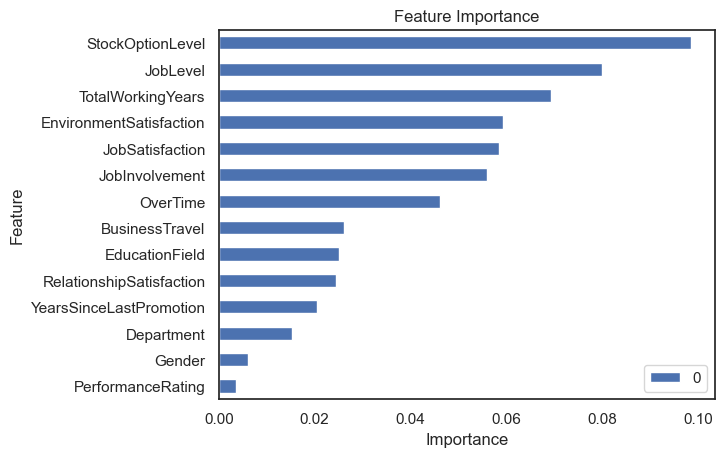

In [33]:
feat = pd.Series(importances, index=features).sort_values()
SortedDF= pd.DataFrame(feat)
minMax =pd.concat([SortedDF.head(7), SortedDF.tail(7)], axis=0)

minMax.plot(kind="barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Attrition")